# Circos plots and other

In [33]:
import pandas as pd
import reframed
import os
import json
import shutil
import copy
import matplotlib.pyplot as plt
import sys 
sys.path.append('../functions/')

import translation_dicts
import general_functions as general_func
import colors_MAGs as color_func

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import steadiercom_plotting_functions as steadier_plot_func

import steadiercom_data_processing as steadier_data_func

In [36]:

source_dict = {'Marshland': 'M', 'Compost_Digestate': 'CD', 'Cow_Manure': 'CM'}

In [37]:
met_chebi_class = pd.read_csv("../output/met_chebi_class.tsv",index_col=0,sep="\t")
met_chebi_class.head(2)

,chebi id,chebi class,self defined super class
M_12ppd__S_e,CHEBI:26191,polyol,other
M_26dap__M_e,CHEBI:33709,amino acid,amino acids and derivatives


In [38]:
all_mags_paper = general_func.read_allmags_data()

### Color palette

**Phyla**

In [39]:

phyla_lut, unique_phyla, phylum_colors = color_func.phylum_colors_func()


**Metabolites**

In [40]:
chebi_lut, chebi_interesting, chebi_colors_ser = color_func.chebi_rxn_color_func(rxn_based=False)


In [41]:
interesting_super_classes =list(chebi_interesting["self defined super class"].dropna().unique())

# Circosplots

In [42]:
steadiercom_crossfeeding_all = pd.read_csv("../output/steadiercom_single_sim_0.1.3/steadiercom_crossfeeding_basic.tsv",sep="\t",index_col=(0,1))

### CD_A

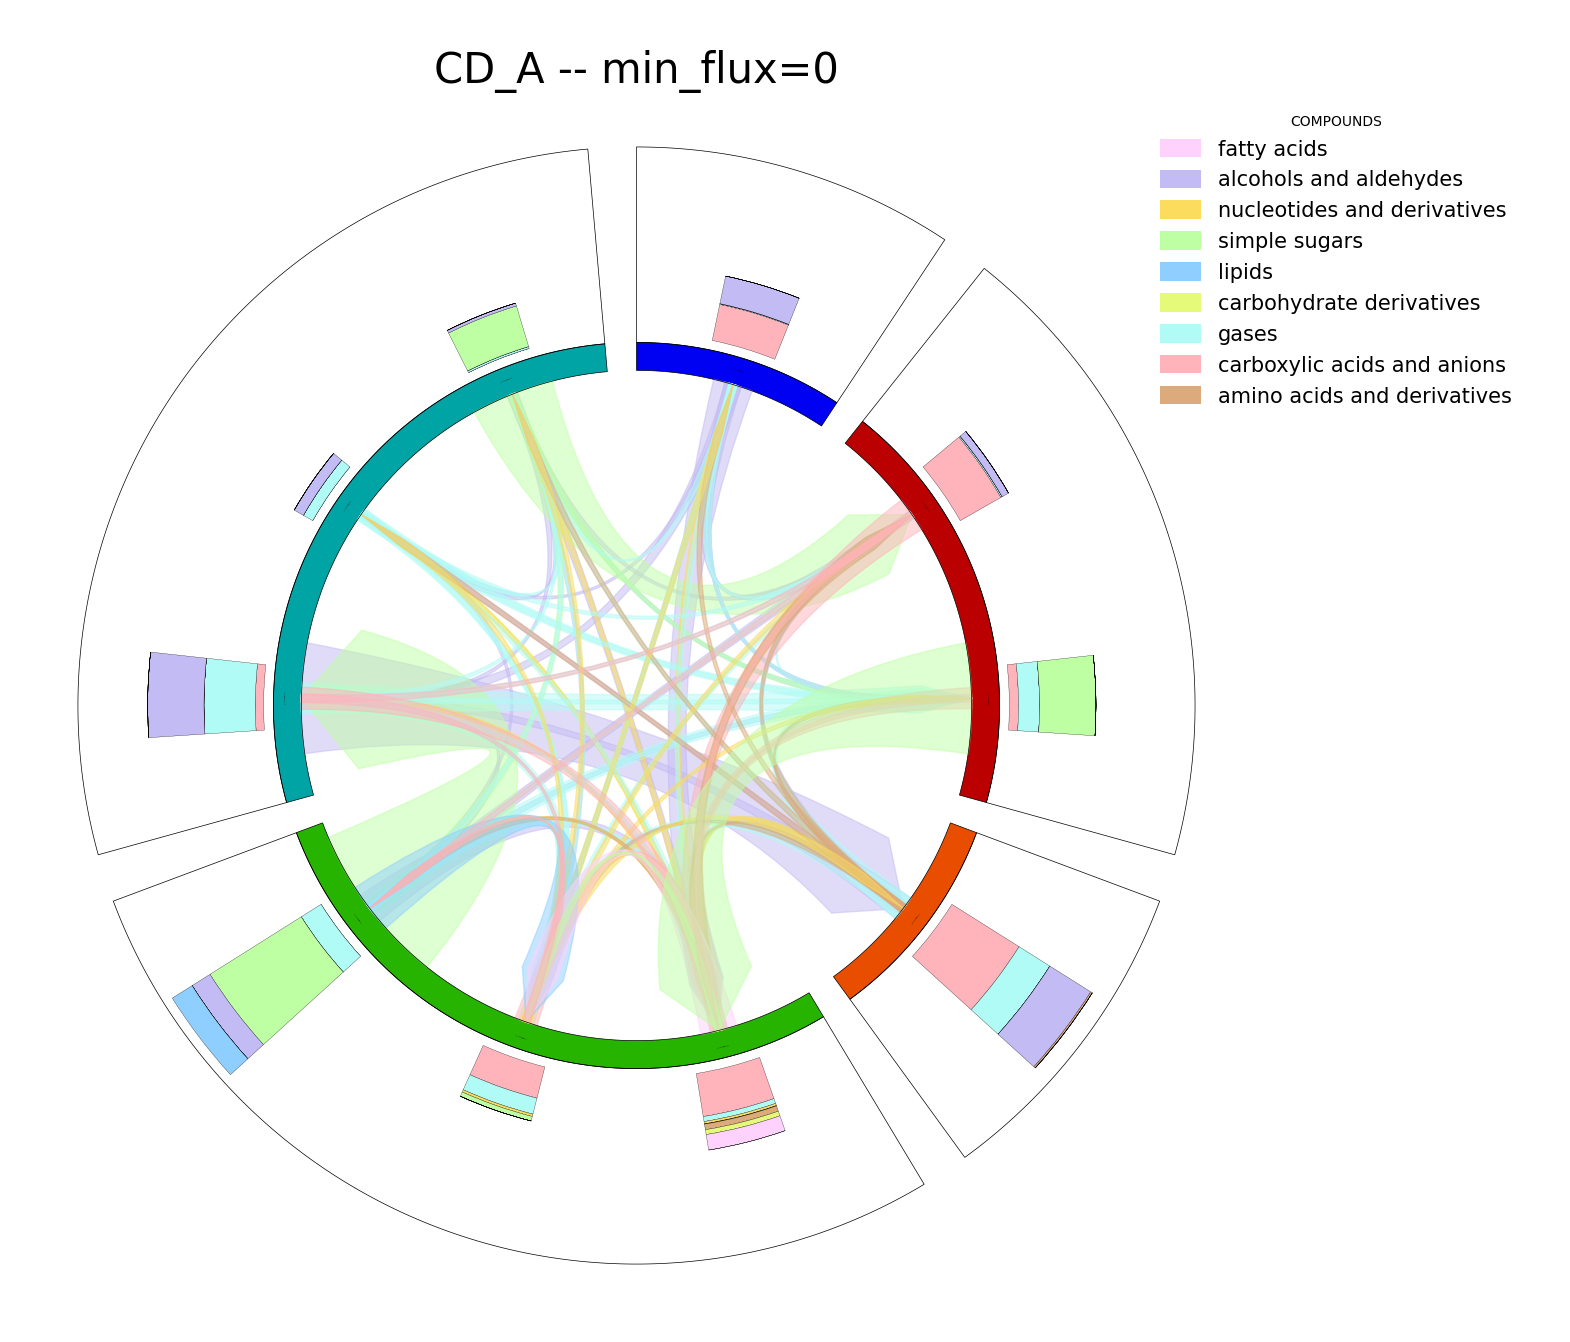

In [43]:
links,data_df,phyla_groups = steadier_plot_func.circos_plot_process_data(steadiercom_crossfeeding_all,community_id="CD_A",min_flux=0,scale_by_flux=True,compound_type=interesting_super_classes,fluxorrate="rate")

fig = steadier_plot_func.plot_circos_plot(links,data_df,phyla_groups,title="CD_A -- min_flux=0")
#fig.savefig("figures_for_meeting/steadycom_circos_CD_A_interesting",bbox_inches='tight')

# New circos plots

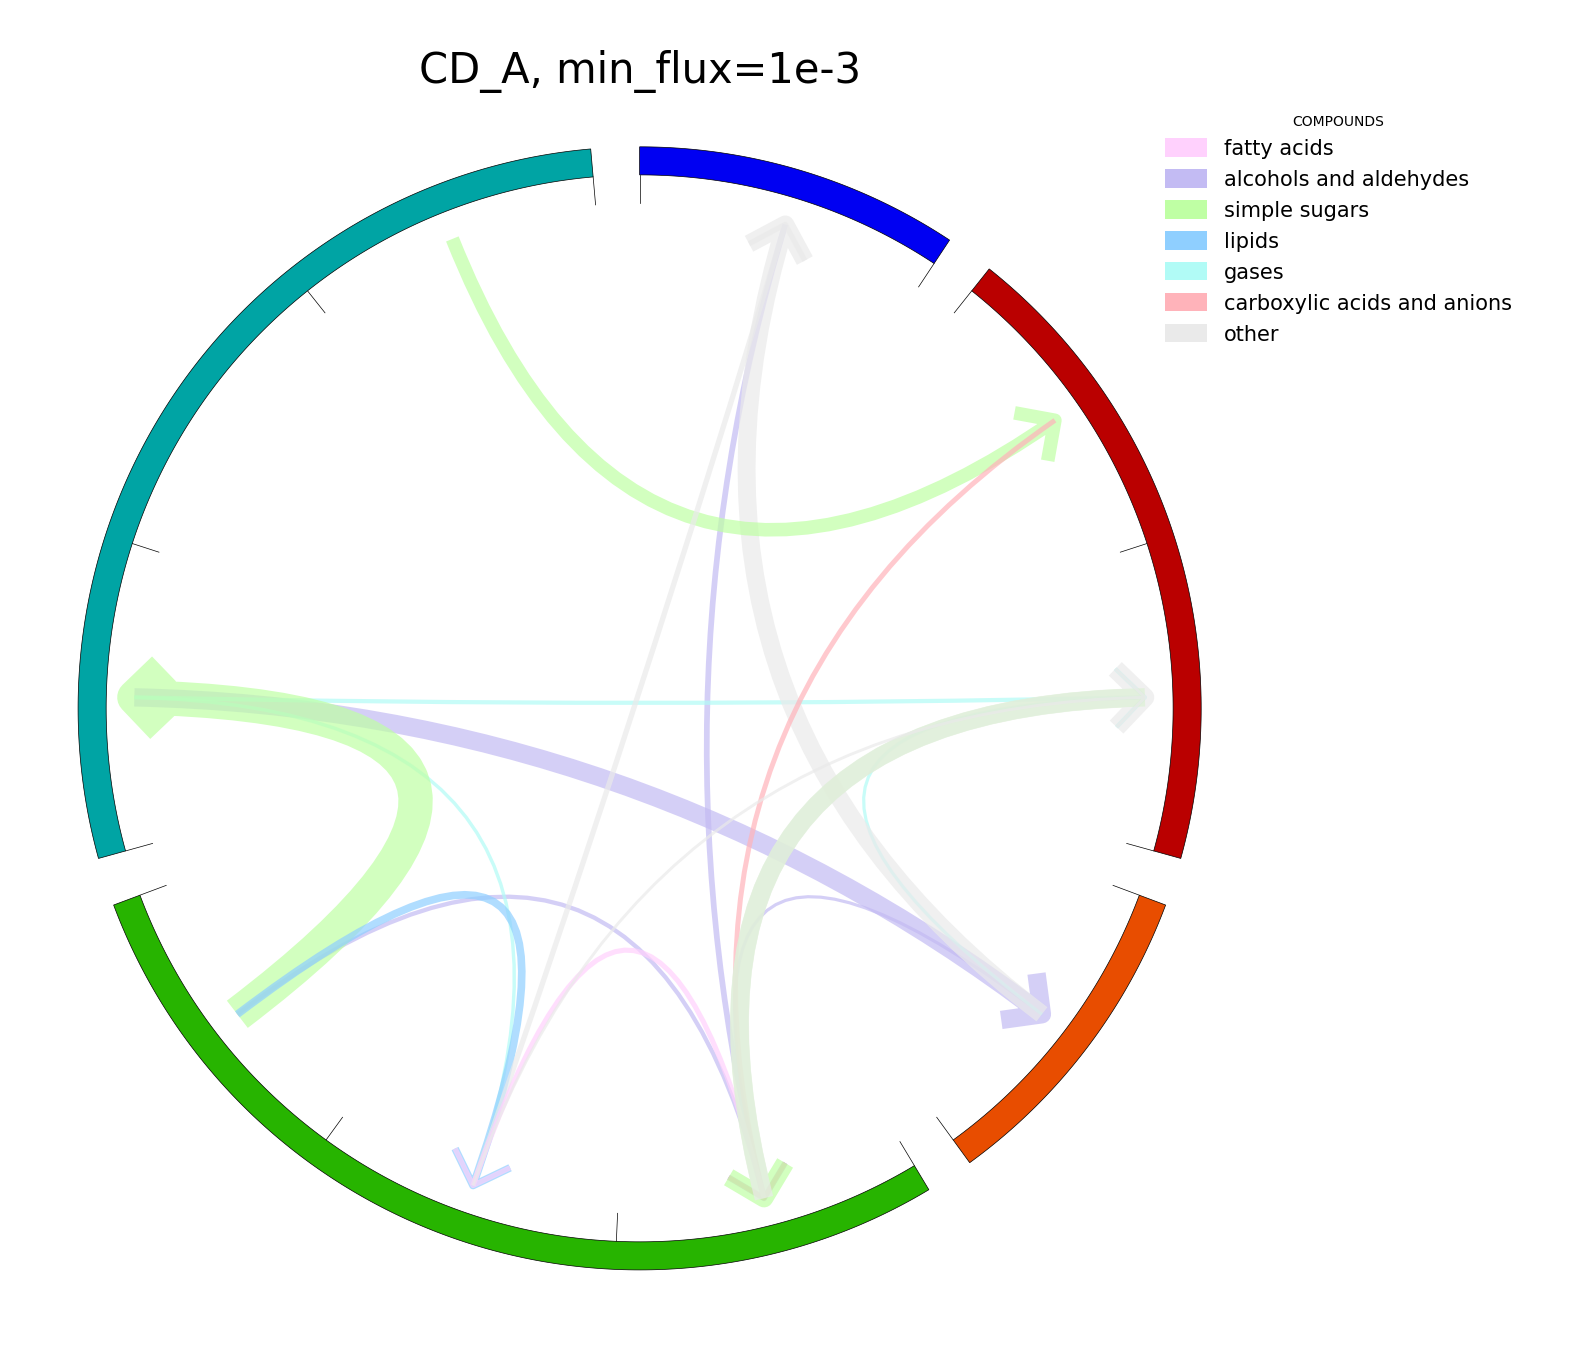

In [44]:
links,phyla_groups = steadier_plot_func.circos_plot_process_data2(steadiercom_crossfeeding_all,community_id="CD_A",min_flux=1e-3,fluxorrate="rate")

fig = steadier_plot_func.plot_circos_plot2(links,phyla_groups,color_by_source=False,title="CD_A, min_flux=1e-3")

#fig.savefig("figures_midterm/steadycom_circos_CD_A")

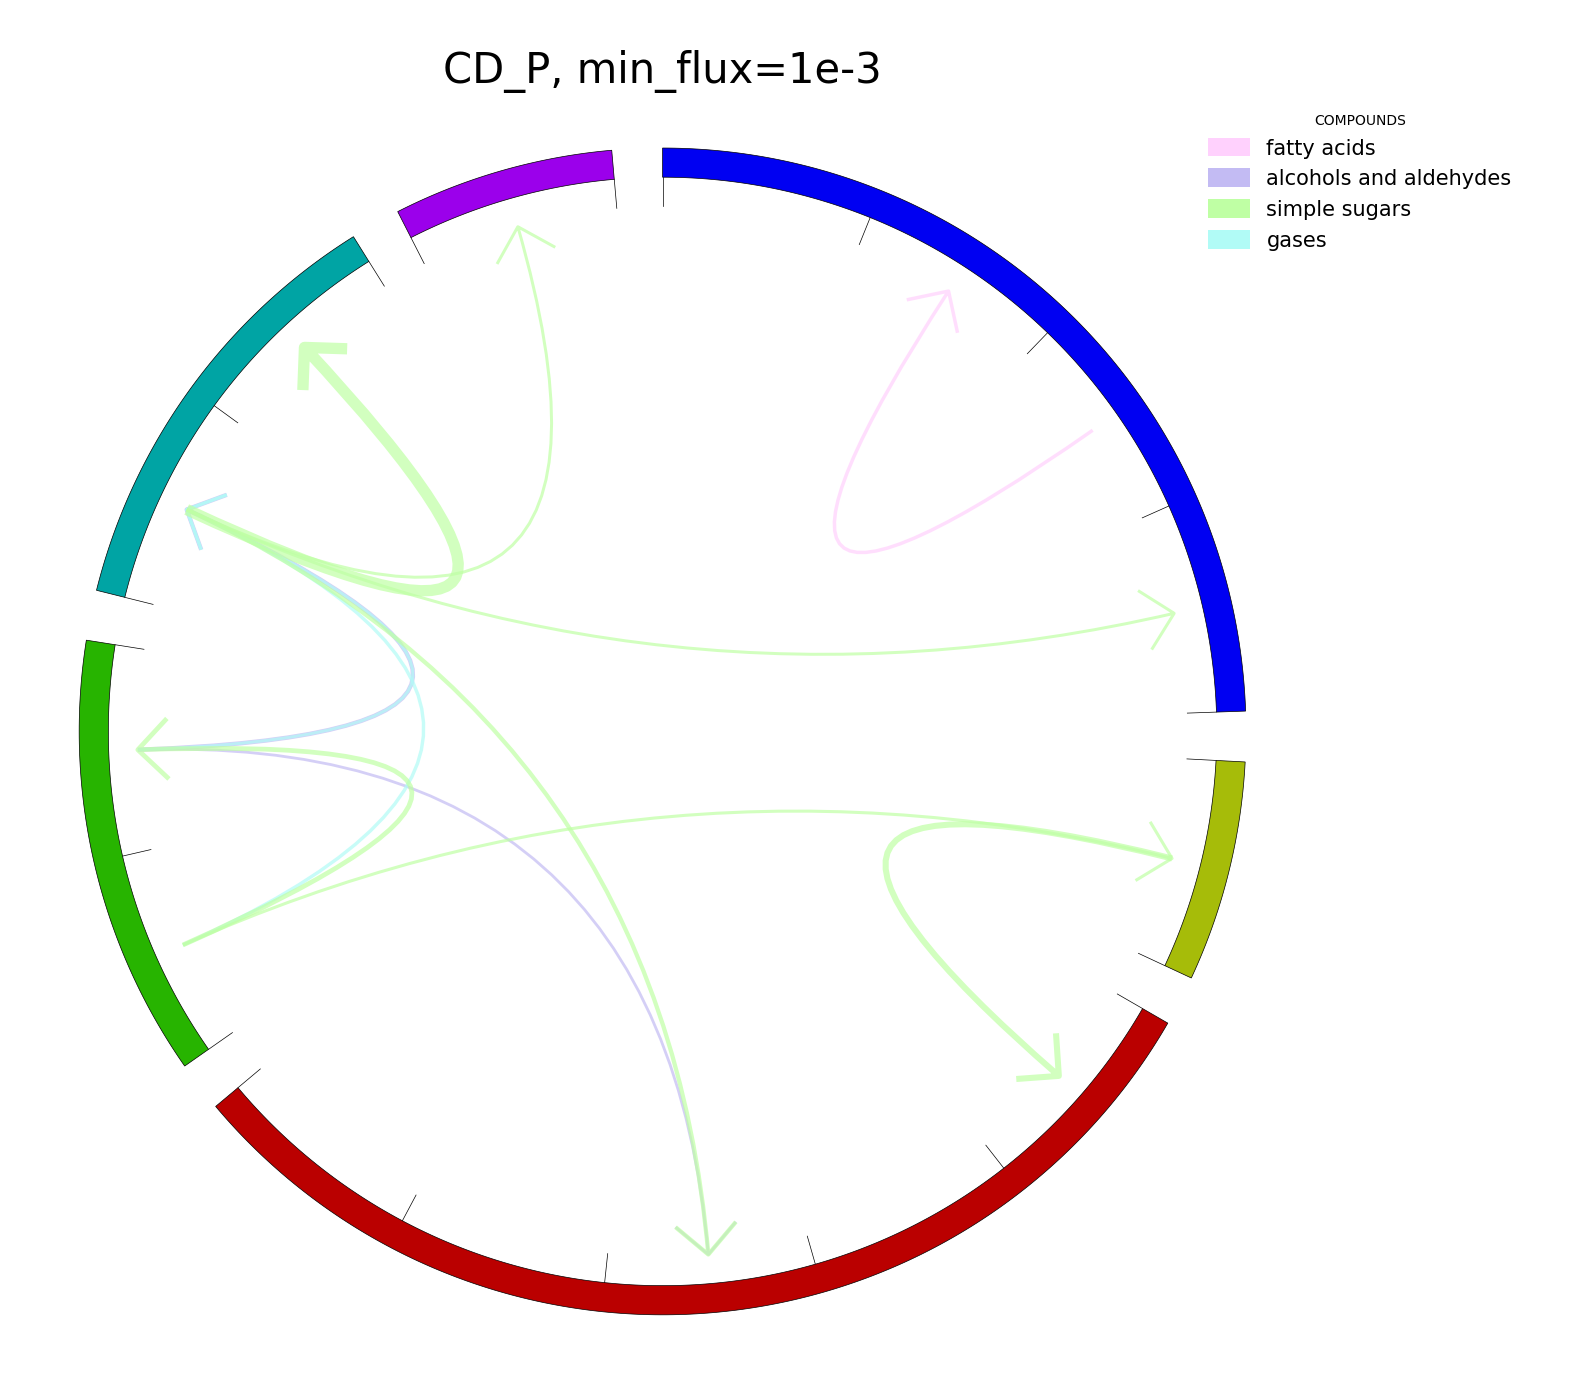

In [45]:
links,phyla_groups = steadier_plot_func.circos_plot_process_data2(steadiercom_crossfeeding_all,community_id="CD_P",min_flux=1e-3,compound_type=interesting_super_classes,fluxorrate="rate")

fig = steadier_plot_func.plot_circos_plot2(links,phyla_groups,color_by_source=False,title="CD_P, min_flux=1e-3")

##fig.savefig("figures_for_conference_new/steadycom_circos_M_P_carbon")

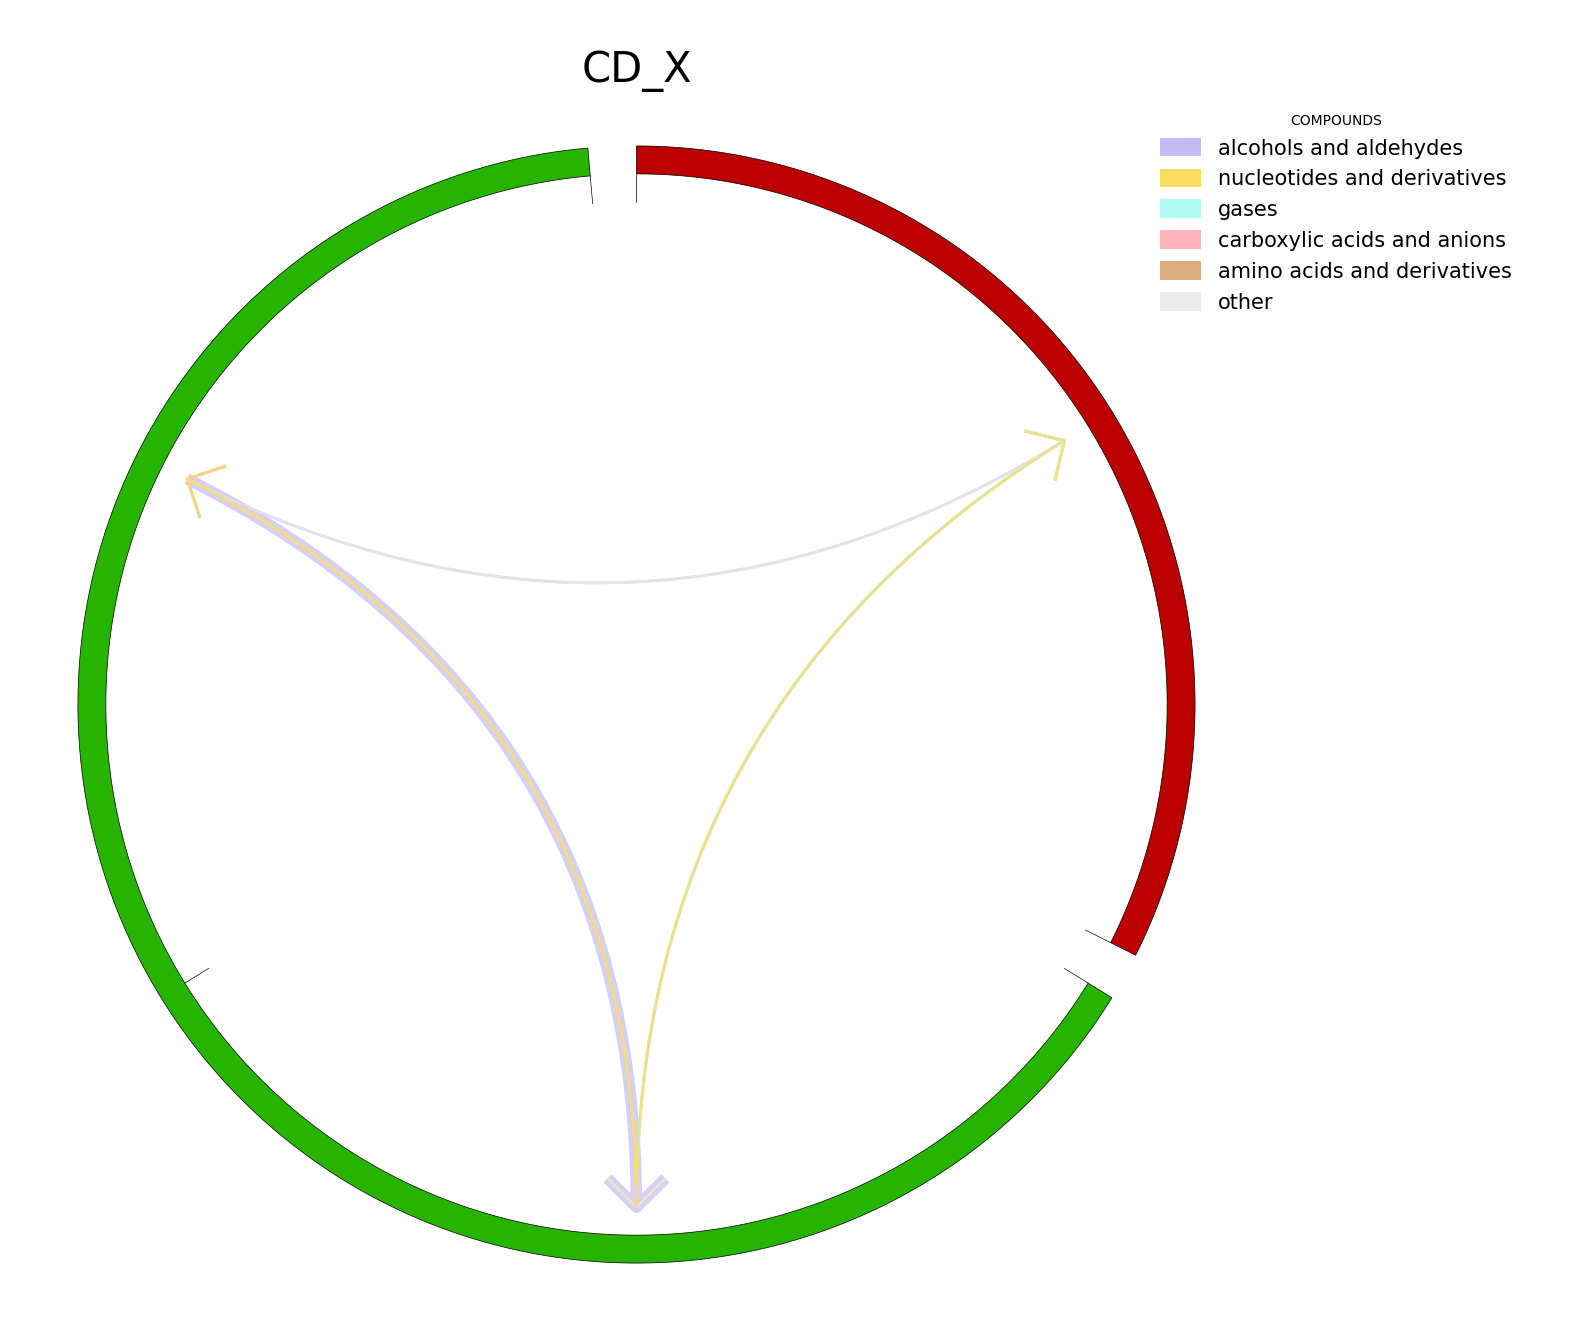

In [46]:
links,phyla_groups = steadier_plot_func.circos_plot_process_data2(steadiercom_crossfeeding_all,community_id="CD_X",fluxorrate="rate")

fig = steadier_plot_func.plot_circos_plot2(links,phyla_groups,color_by_source=False,title="CD_X")

#fig.savefig("figures_midterm/steadycom_circos_CD_X")

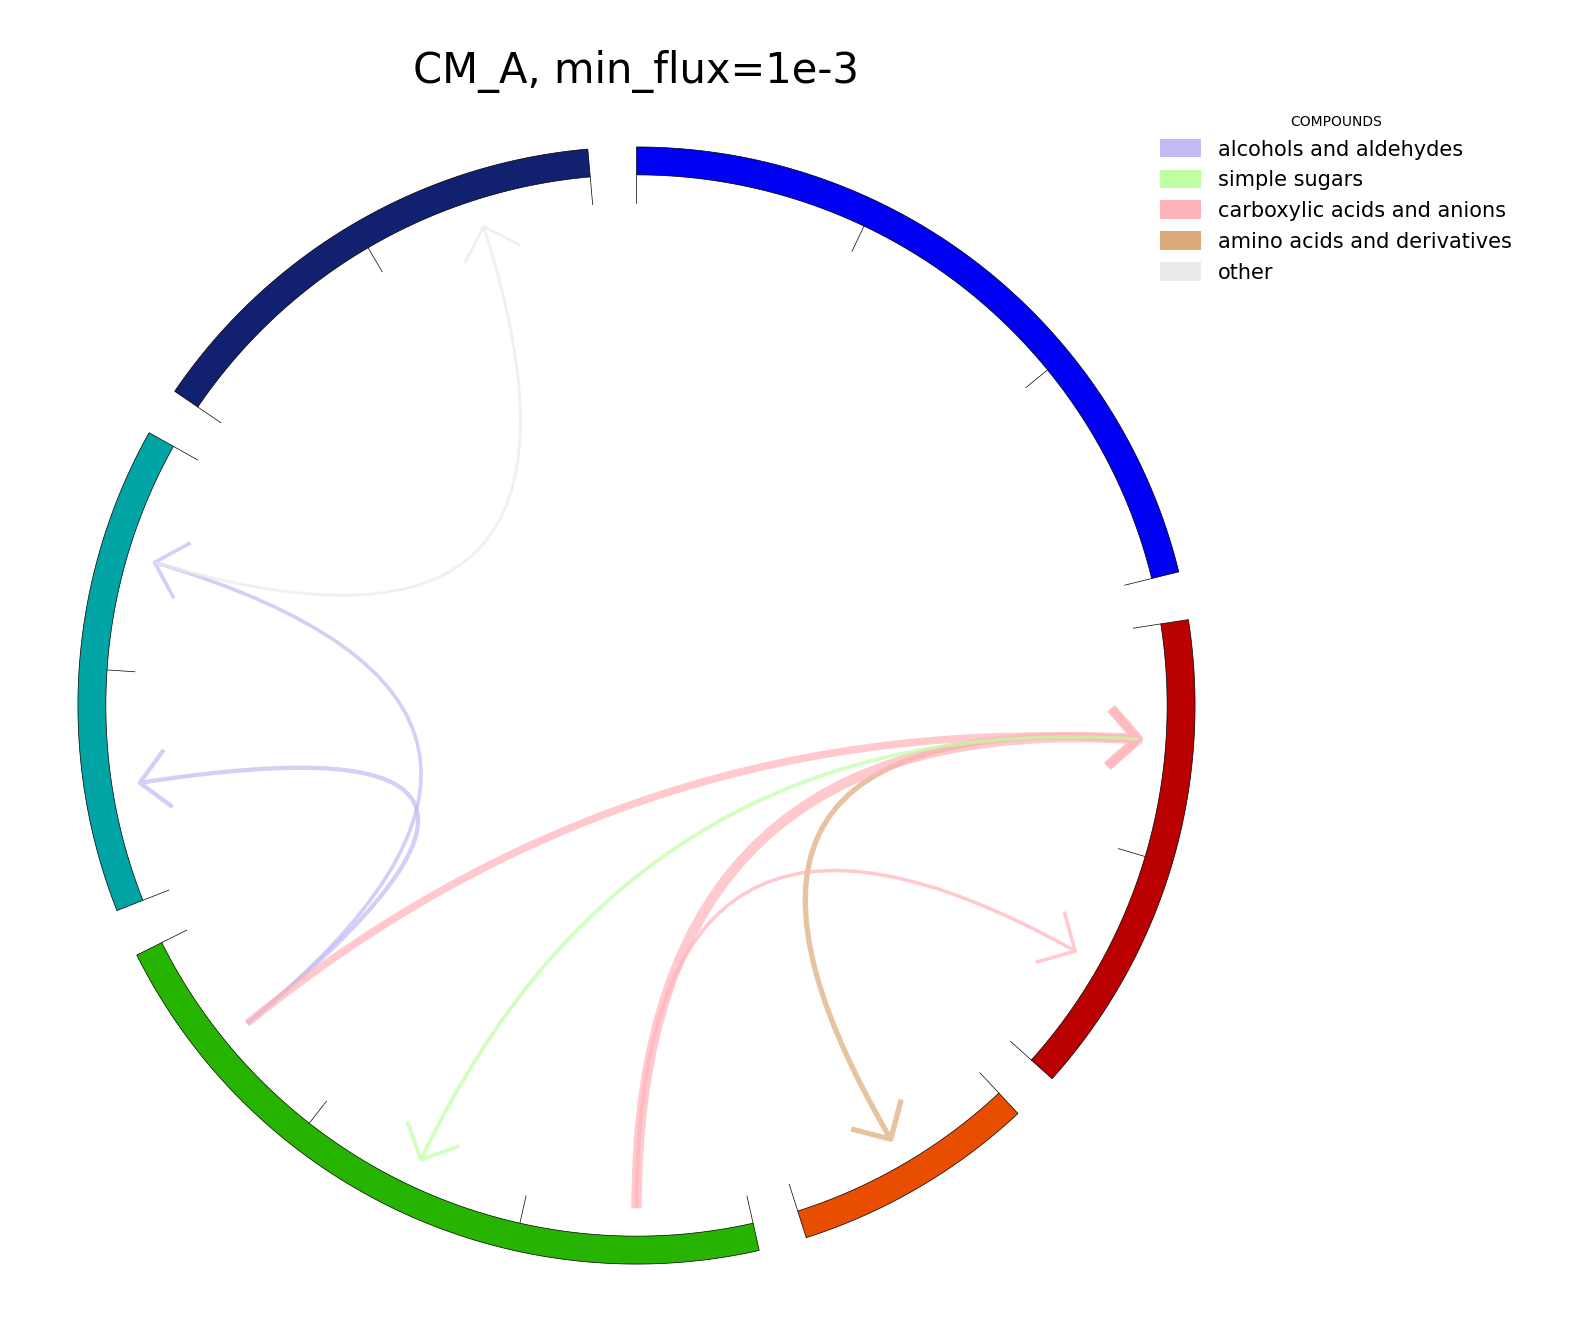

In [47]:
links,phyla_groups = steadier_plot_func.circos_plot_process_data2(steadiercom_crossfeeding_all,min_flux=1e-3,community_id="CM_A",fluxorrate="rate")

fig = steadier_plot_func.plot_circos_plot2(links,phyla_groups,color_by_source=False,title="CM_A, min_flux=1e-3")

#fig.savefig("figures_midterm/steadycom_circos_CM_A")

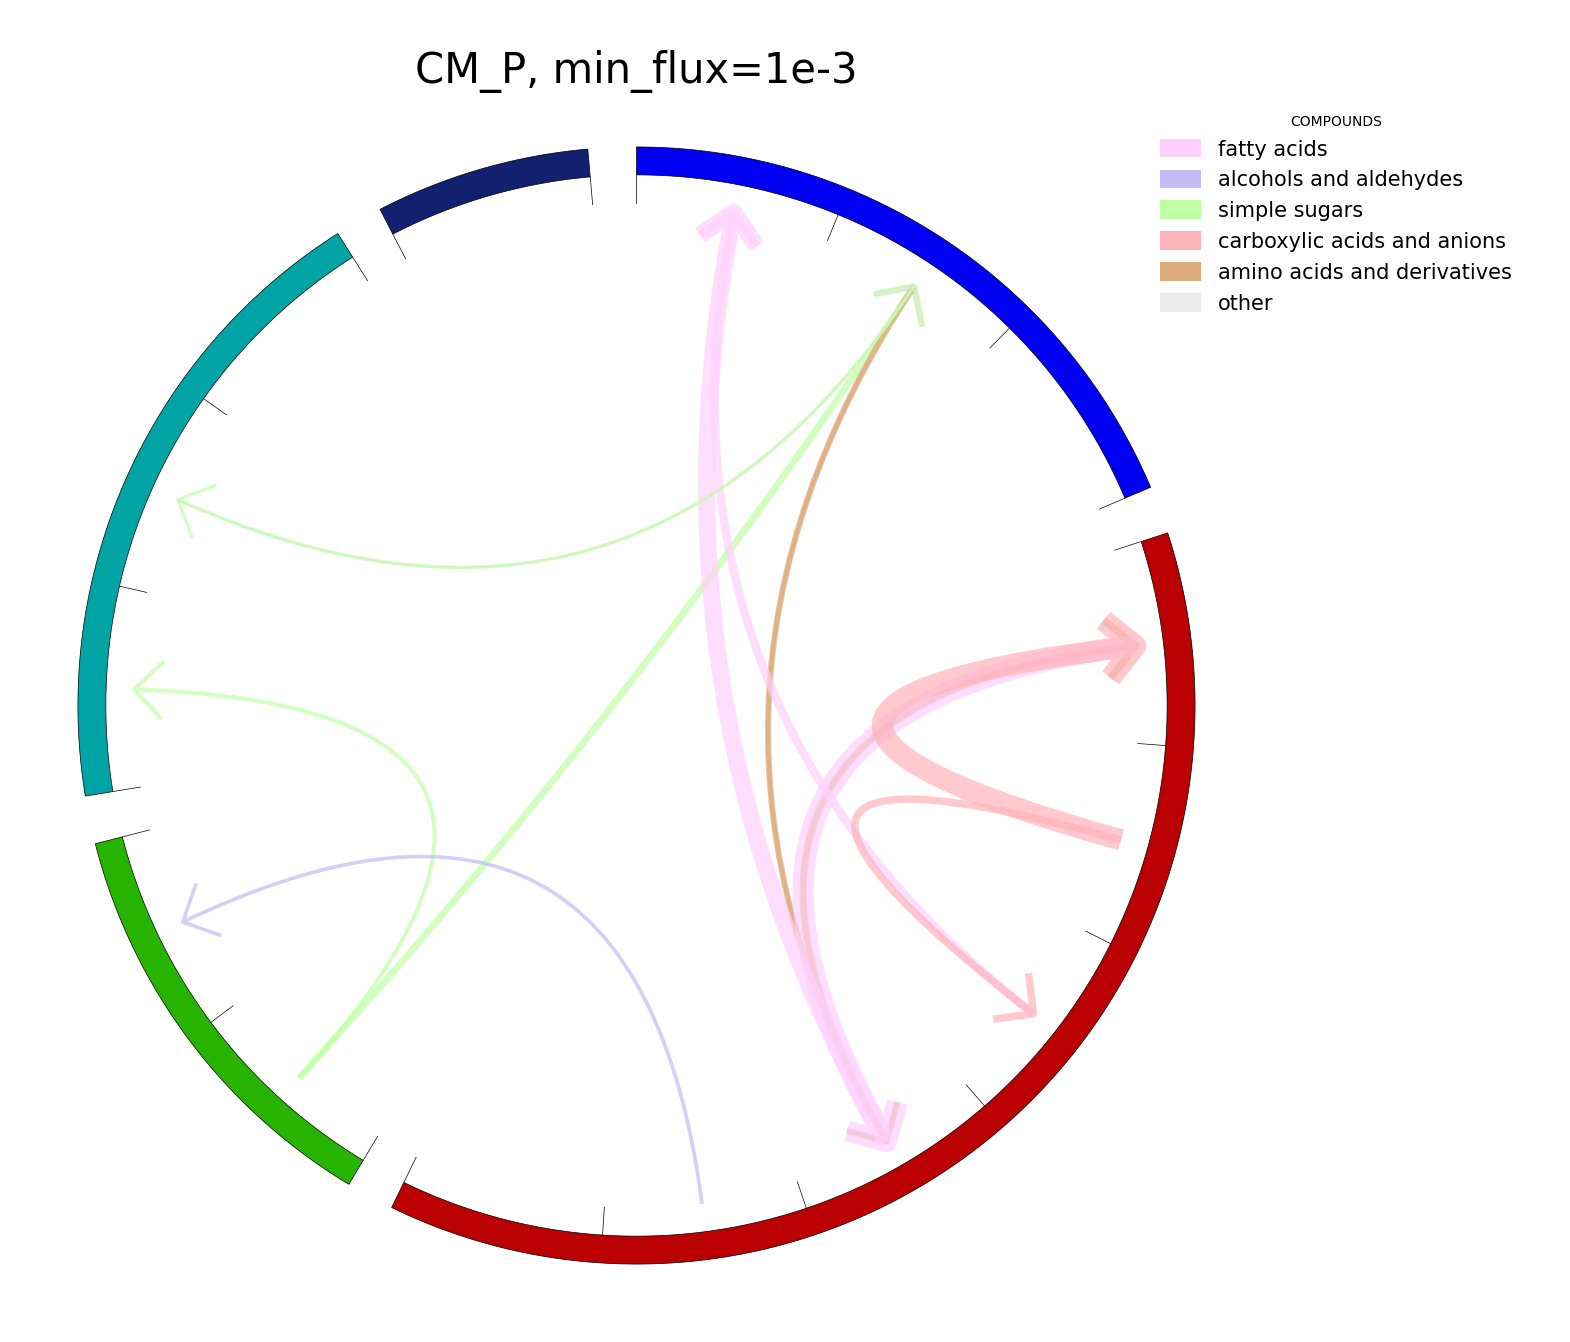

In [48]:
links,phyla_groups = steadier_plot_func.circos_plot_process_data2(steadiercom_crossfeeding_all,min_flux=1e-3,community_id="CM_P",fluxorrate="rate")

fig = steadier_plot_func.plot_circos_plot2(links,phyla_groups,color_by_source=False,title="CM_P, min_flux=1e-3")

#fig.savefig("figures_midterm/steadycom_circos_CM_P")

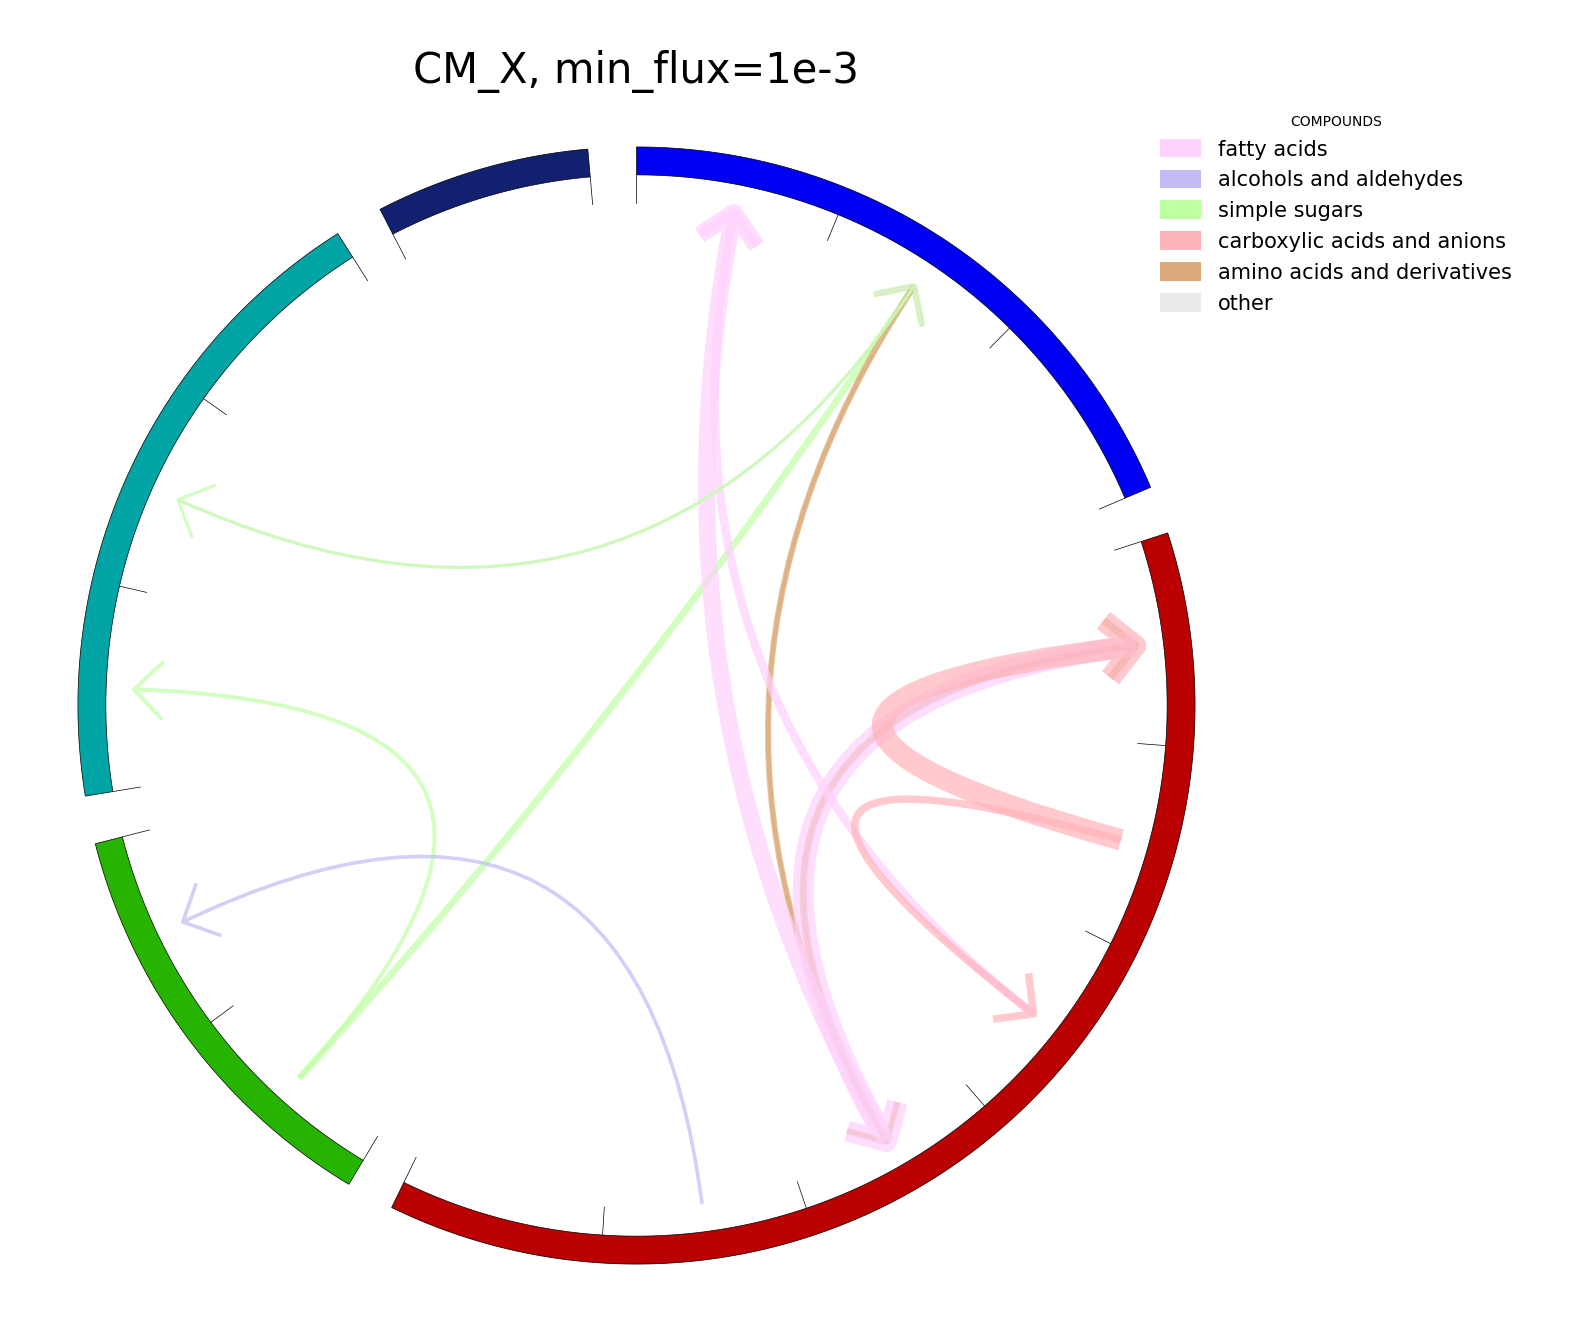

In [49]:
links,phyla_groups = steadier_plot_func.circos_plot_process_data2(steadiercom_crossfeeding_all,min_flux=1e-3,community_id="CM_P",fluxorrate="rate")

fig = steadier_plot_func.plot_circos_plot2(links,phyla_groups,color_by_source=False,title="CM_X, min_flux=1e-3")

#fig.savefig("figures_midterm/steadycom_circos_CM_P")

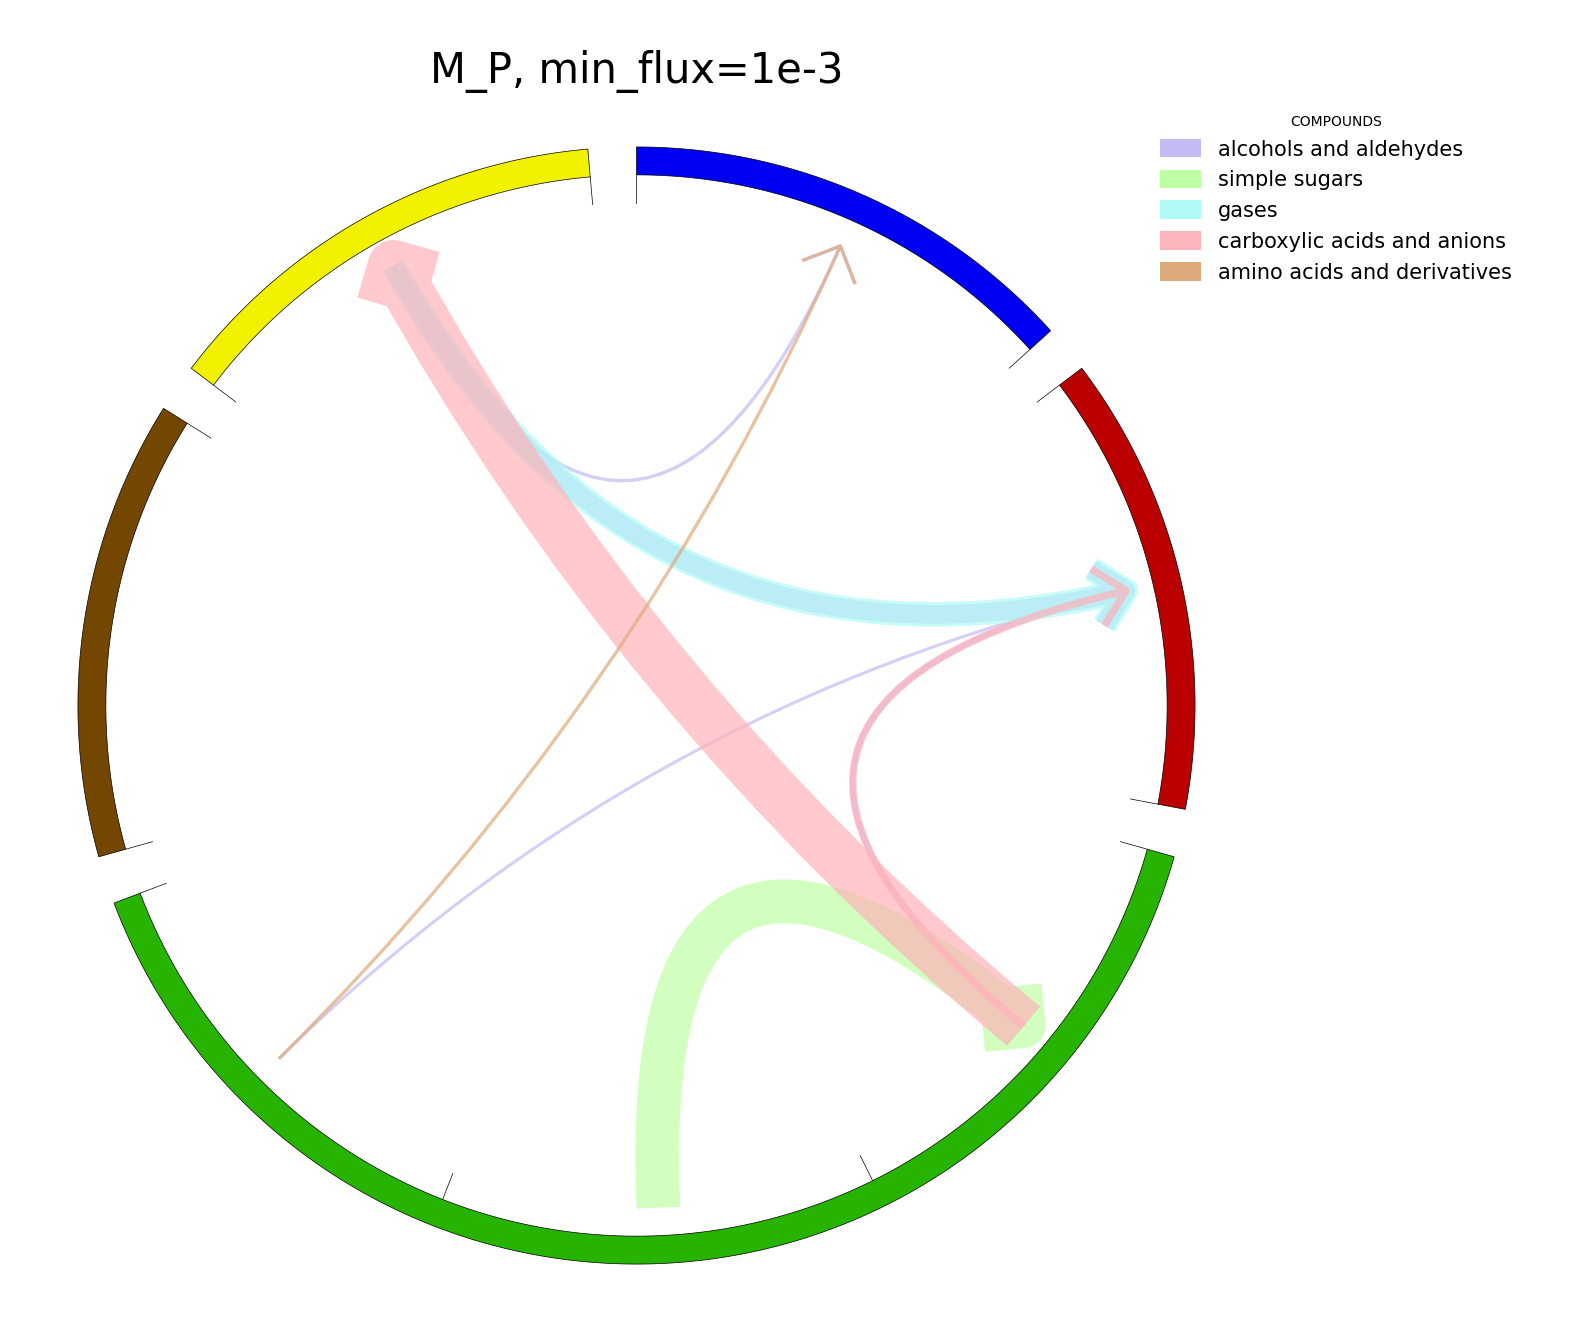

In [50]:
links,phyla_groups = steadier_plot_func.circos_plot_process_data2(steadiercom_crossfeeding_all,min_flux=1e-3,community_id="M_P",fluxorrate="rate")

fig = steadier_plot_func.plot_circos_plot2(links,phyla_groups,color_by_source=False,title="M_P, min_flux=1e-3")

#fig.savefig("figures_midterm/steadycom_circos_M_P")

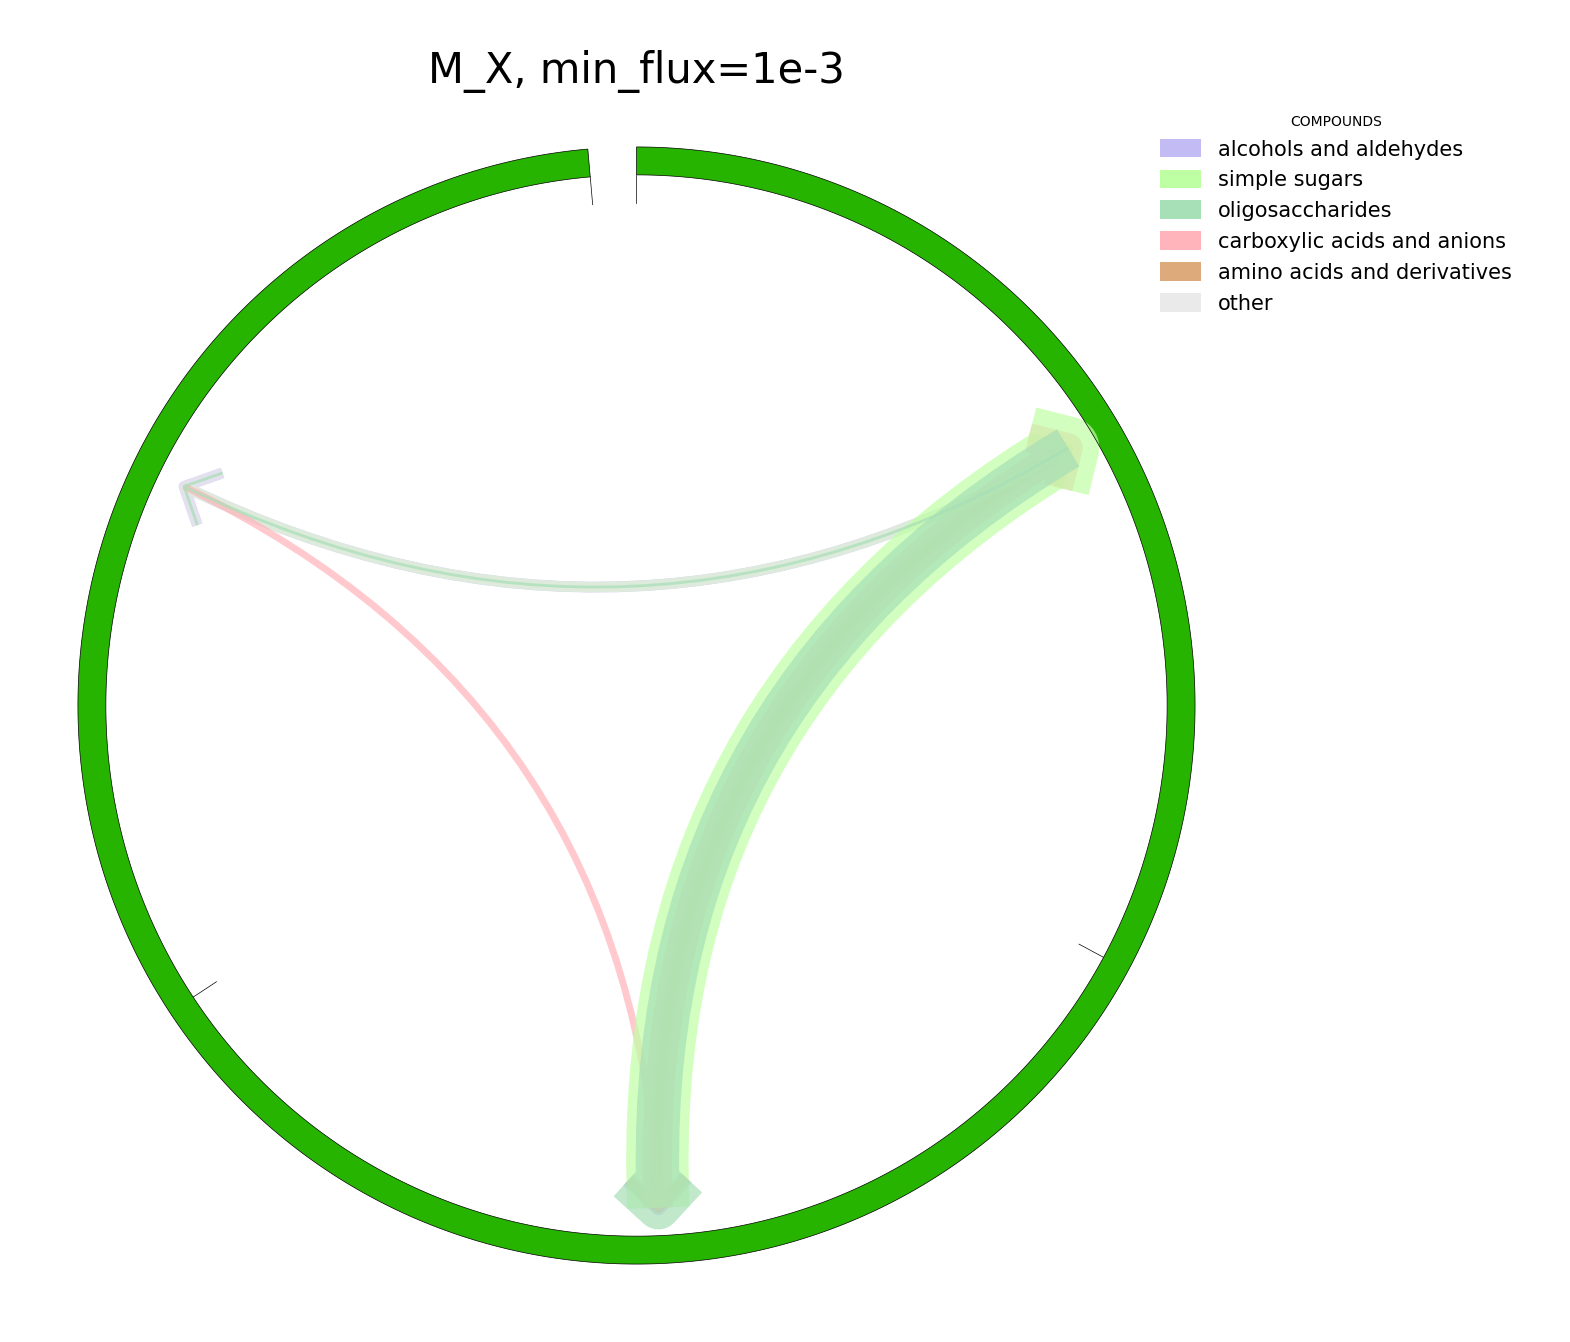

In [51]:
links,phyla_groups = steadier_plot_func.circos_plot_process_data2(steadiercom_crossfeeding_all,community_id="M_X",min_flux=1e-3,fluxorrate="rate")

fig = steadier_plot_func.plot_circos_plot2(links,phyla_groups,color_by_source=False,title="M_X, min_flux=1e-3")

##fig.savefig("figures_for_conference_new/steadycom_circos_M_P_carbon")

# Production and abundance plots

In [52]:
abundance = pd.read_csv("../output/steadiercom_single_sim_0.1.3/abundance.tsv",sep="\t",index_col=(0,1))
abundance

0
CD_A CH13_bin_12  0.426084
     CH13_bin_11  0.118468
     CH13_bin_4   0.117163
     CH13_bin_14  0.112318
     CH13_bin_25  0.078072
...                    ...
M_P  CH1_bin_1    0.021679
     CH1_bin_10   0.014223
M_X  CH3_bin_2    0.763704
     CH3_bin_1    0.220592
     CH3_bin_0    0.015704

[72 rows x 1 columns]

In [53]:
steadiercom_crossfeeding_all = pd.read_csv("../output/steadiercom_single_sim_0.1.3/steadiercom_crossfeeding_basic.tsv",sep="\t",index_col=(0,1))

### CD_A

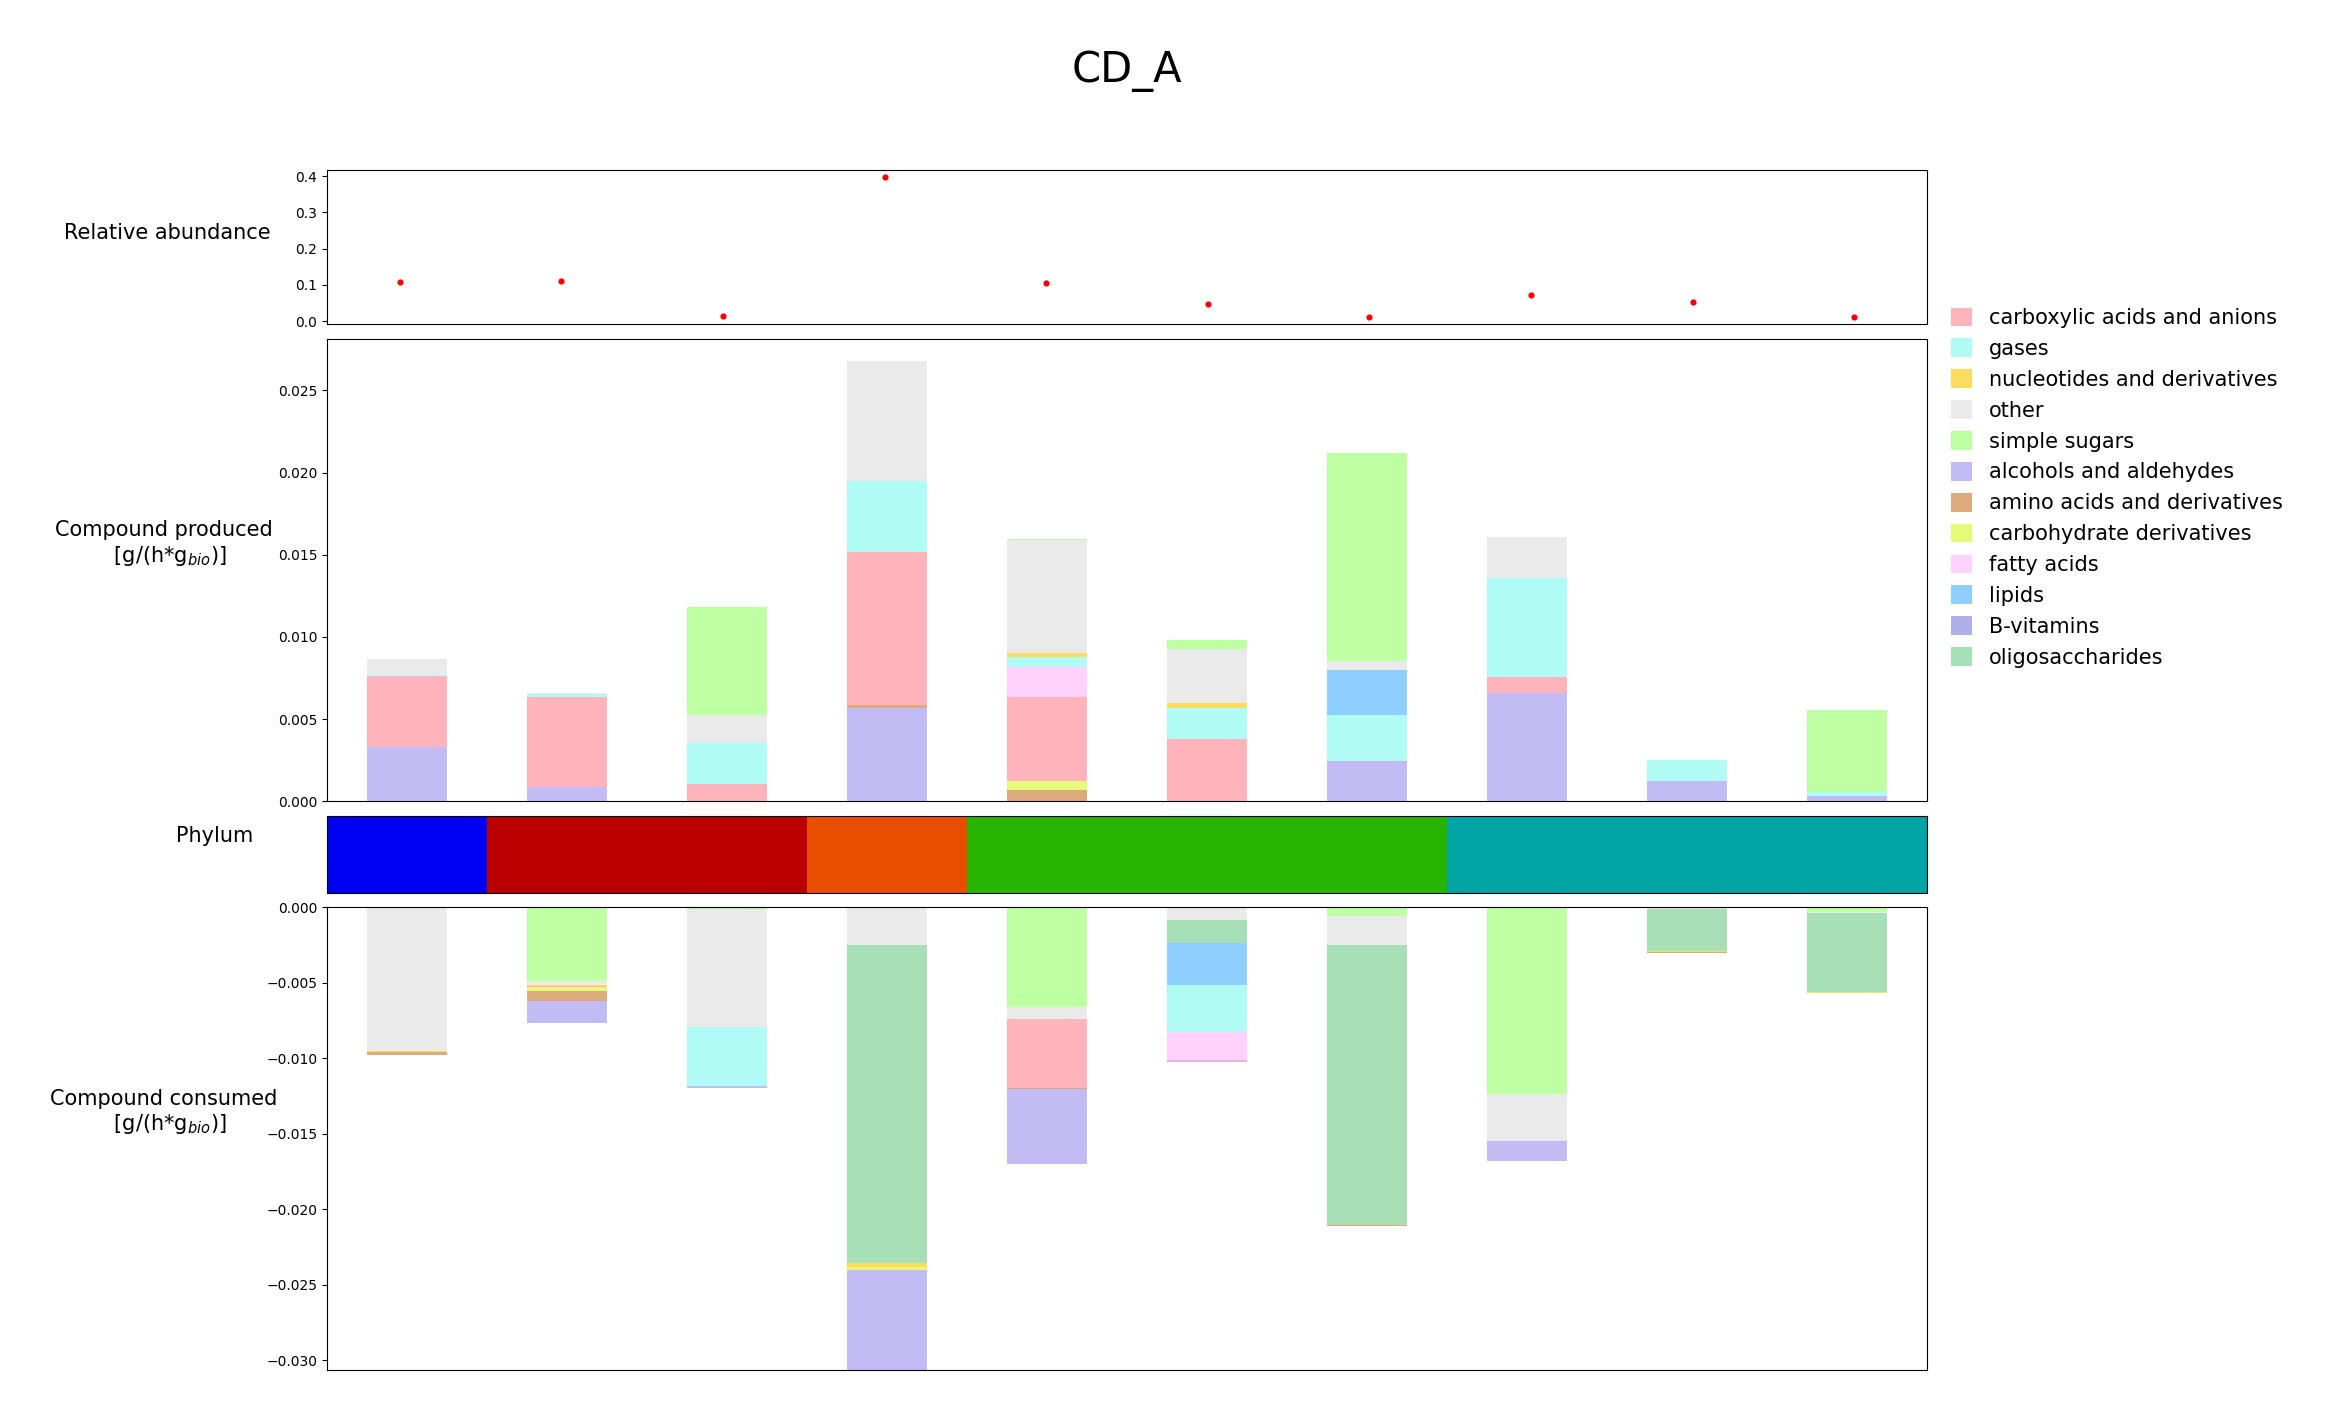

In [54]:
data_receiver_df,data_donor_df,community_abundance = steadier_plot_func.data_uptake_prod(steadiercom_crossfeeding_all,abundance=abundance,community_id="CD_A",fluxorrate="rate")
fig = steadier_plot_func.plot_uptake_prod(data_receiver_df,data_donor_df,community_abundance,title="CD_A")


#fig.savefig("figures_midterm/steadycom_abundance_CD_A")

### CD_P

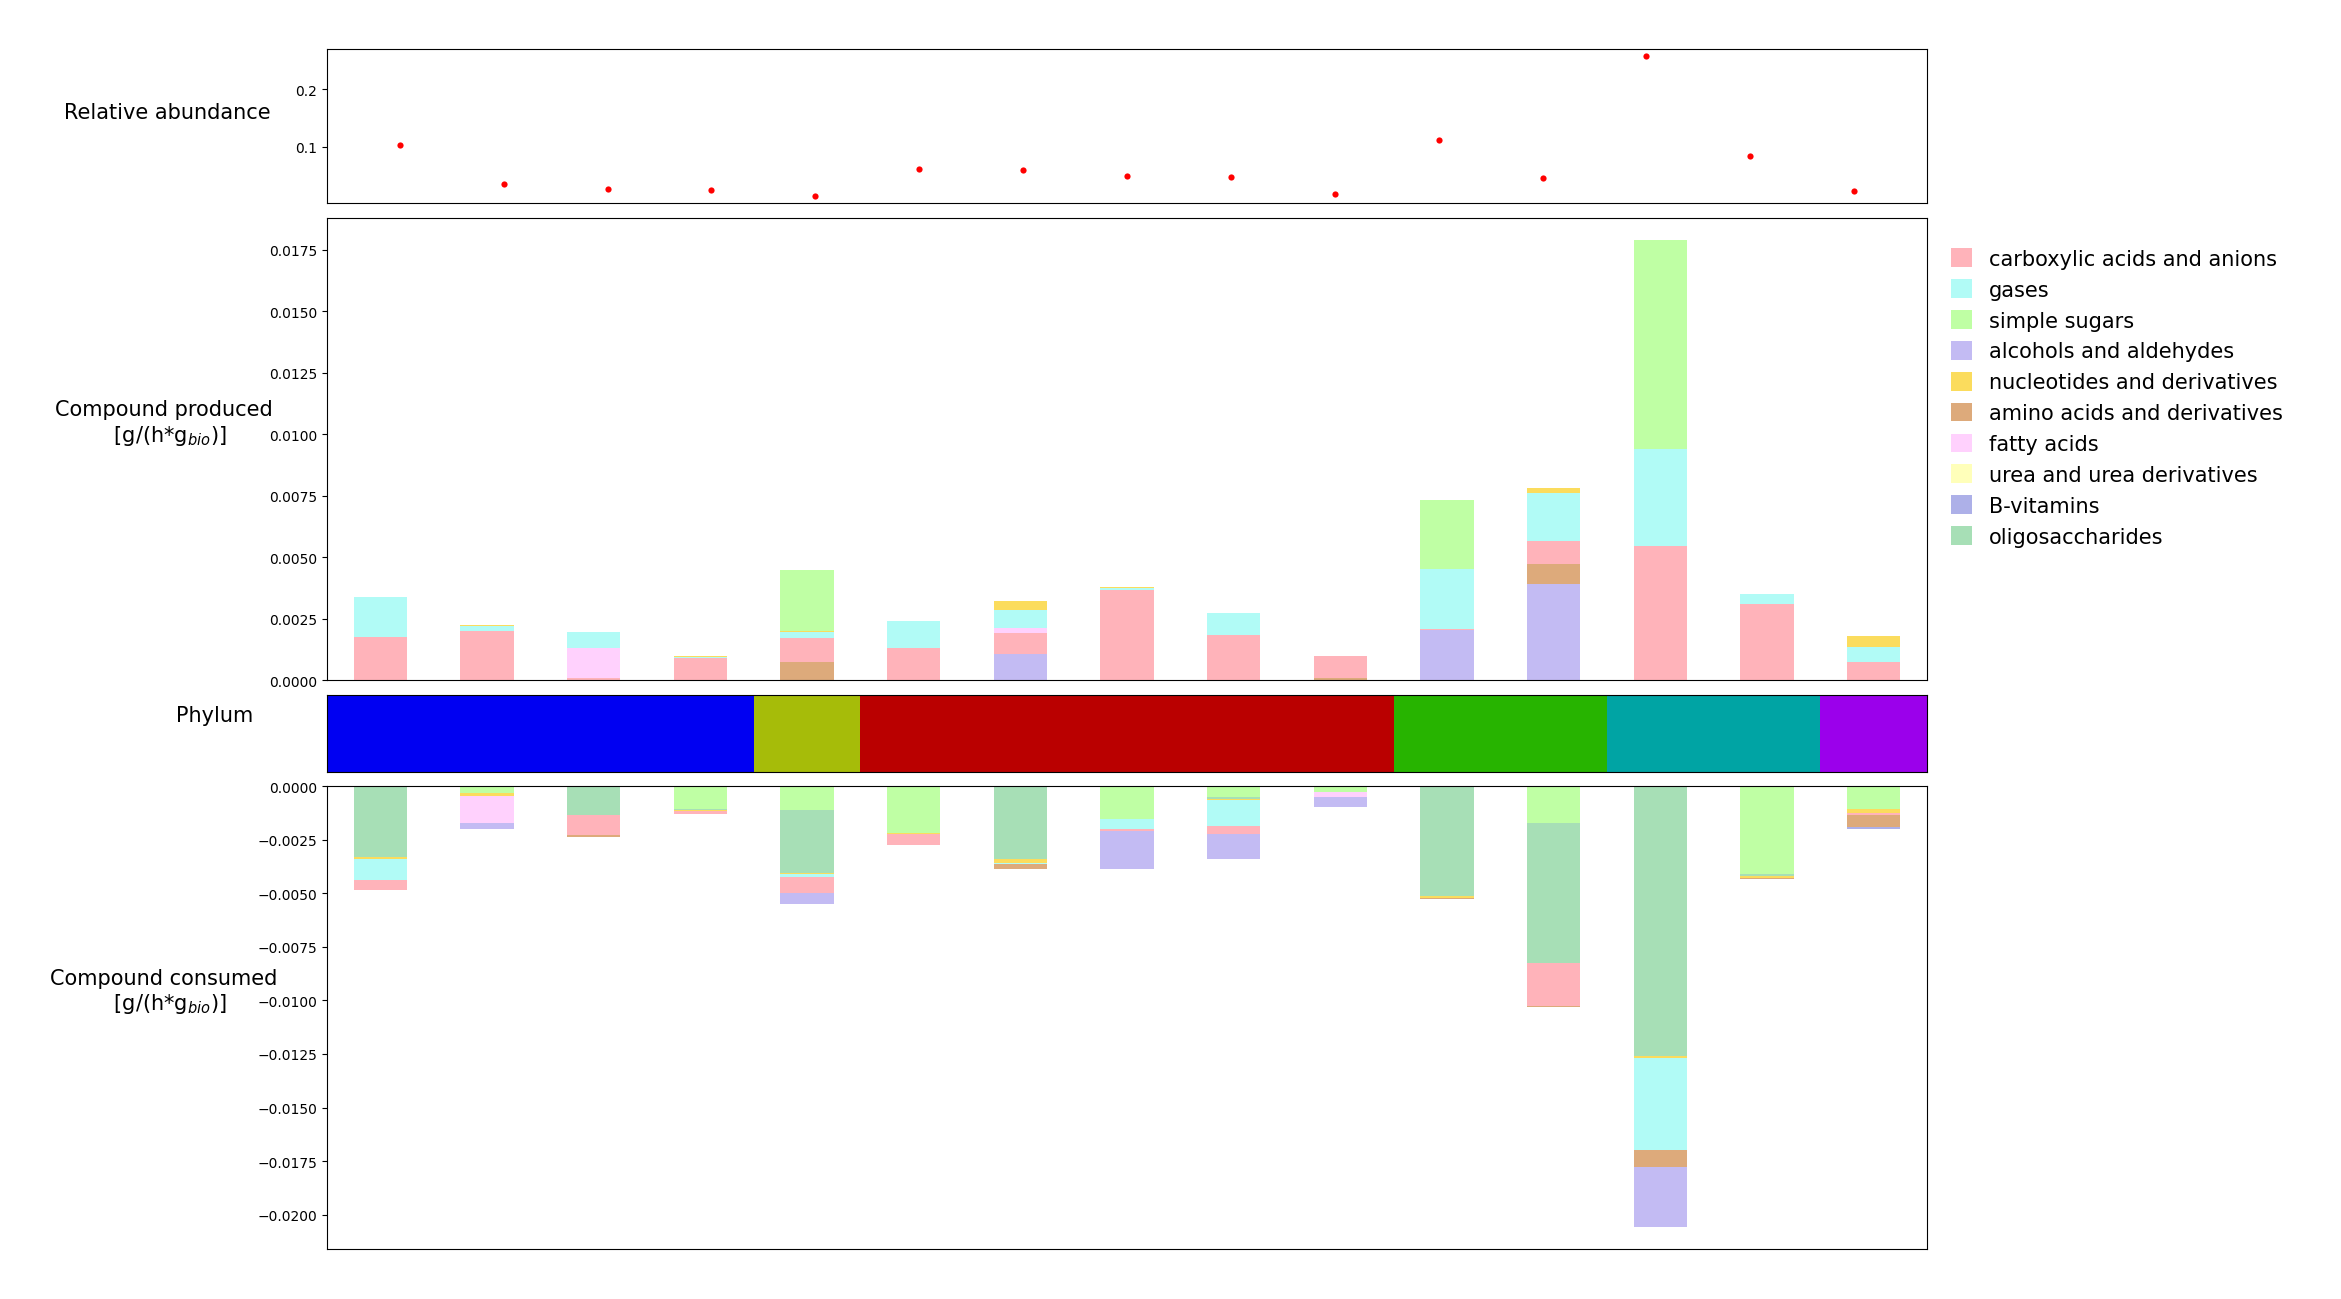

In [55]:
data_receiver_df,data_donor_df,community_abundance =  steadier_plot_func.data_uptake_prod(steadiercom_crossfeeding_all,abundance=abundance,compound_type=interesting_super_classes,community_id="CD_P",fluxorrate="rate")

fig = steadier_plot_func.plot_uptake_prod(data_receiver_df,data_donor_df,community_abundance)
#fig.savefig("figures_midterm/steadycom_abundance_"+"CD_P")


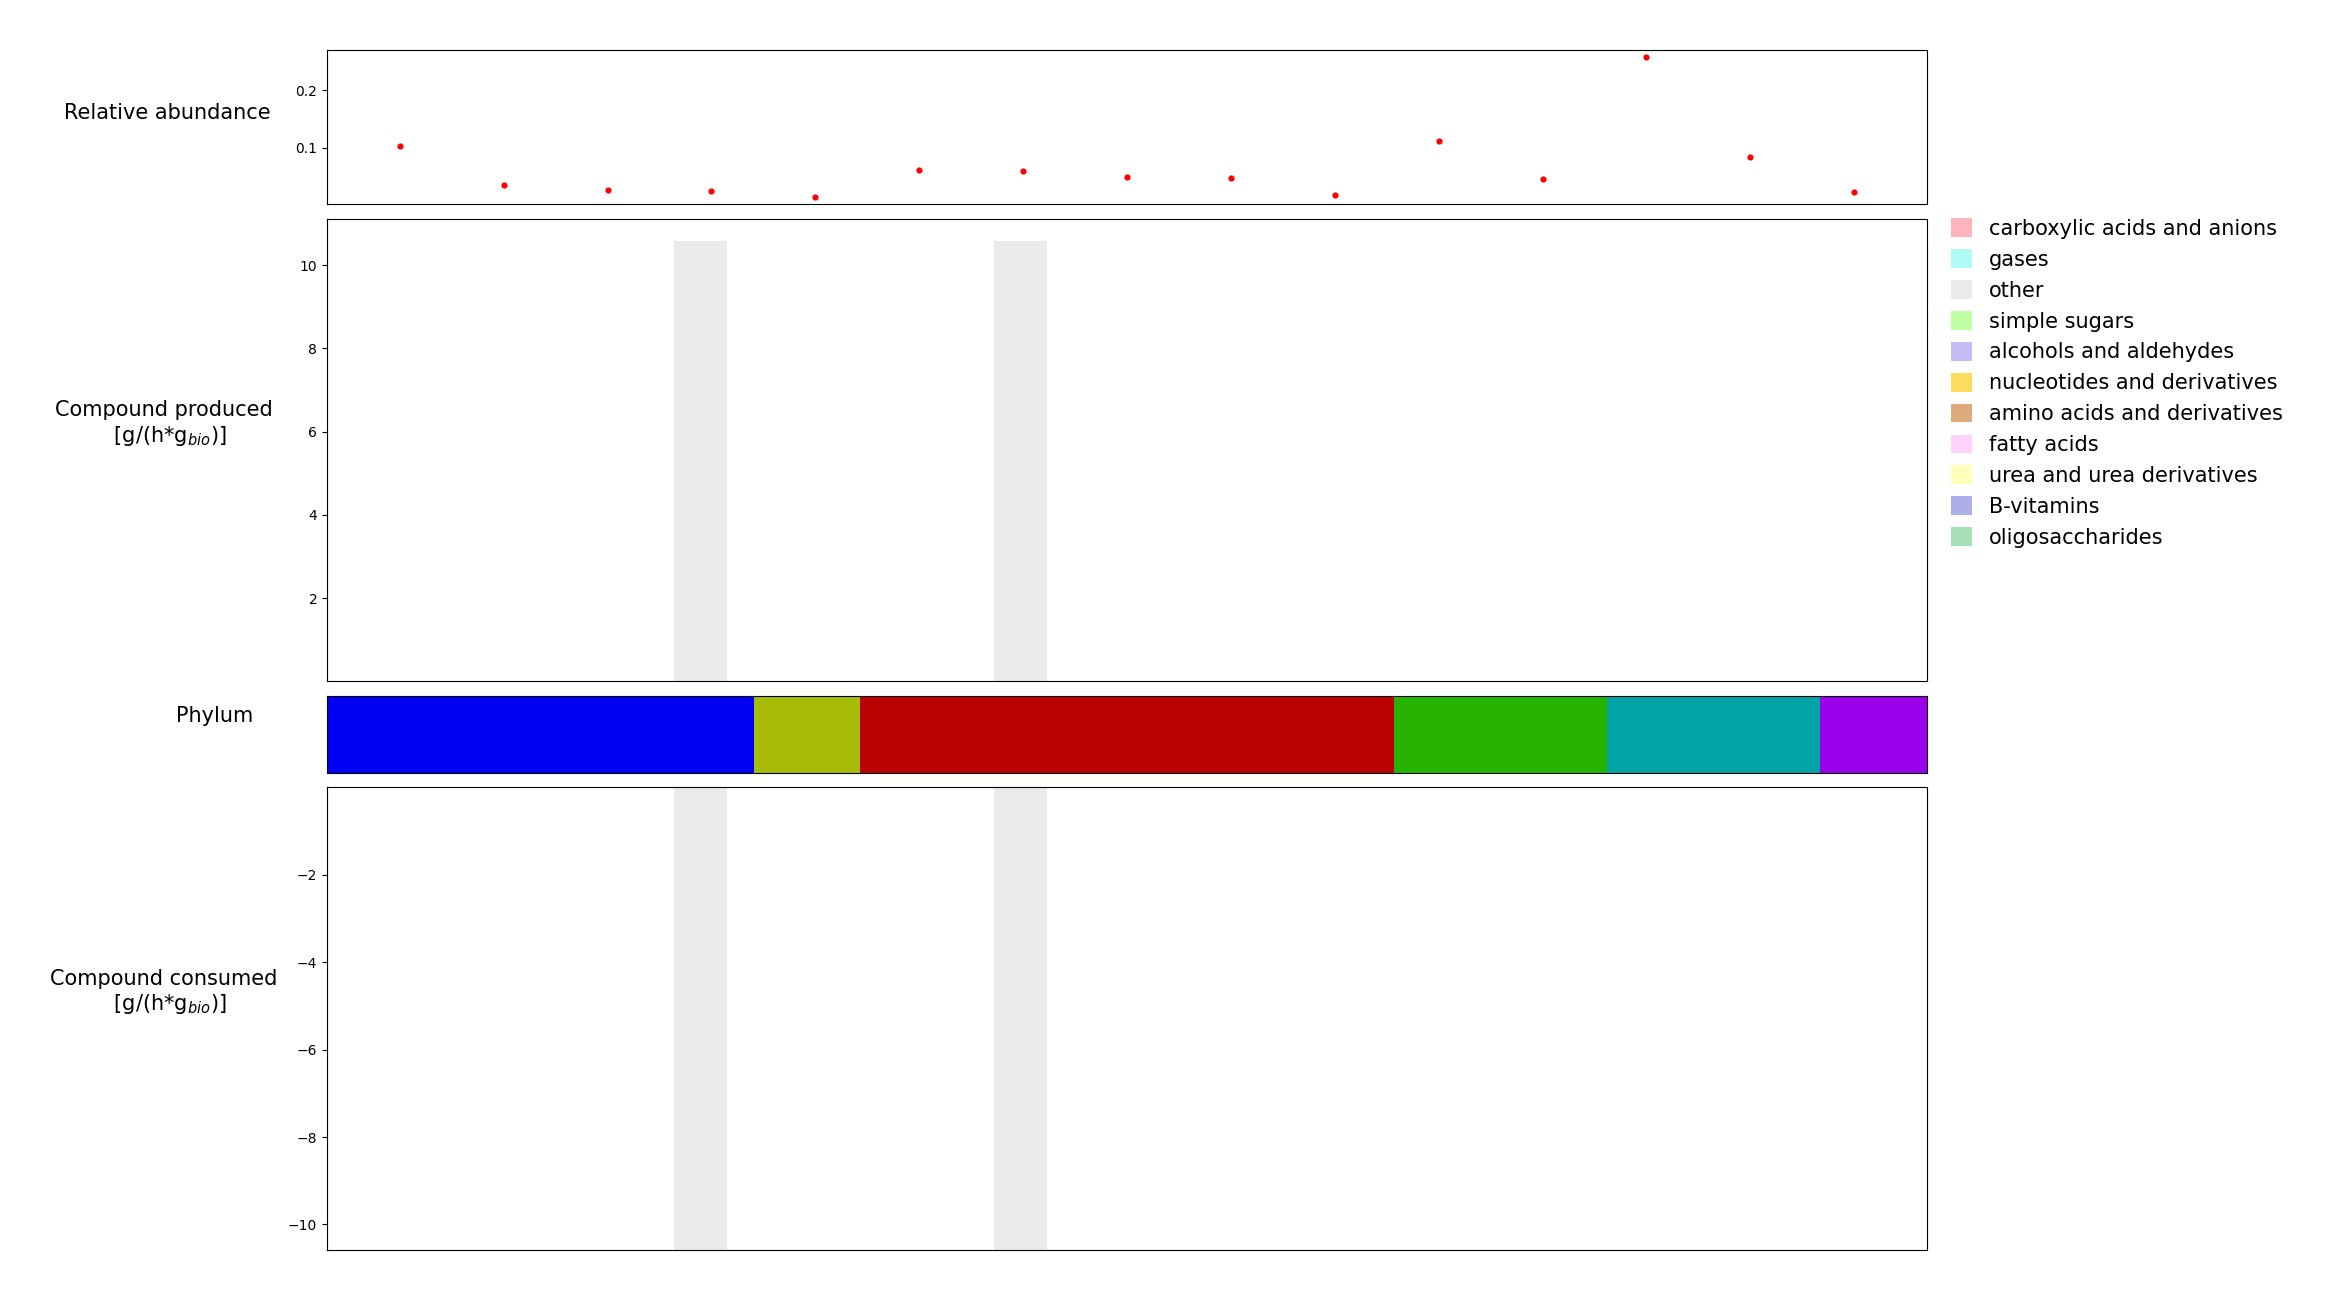

In [56]:
data_receiver_df,data_donor_df,community_abundance =  steadier_plot_func.data_uptake_prod(steadiercom_crossfeeding_all,abundance=abundance,community_id="CD_P",fluxorrate="rate")

fig = steadier_plot_func.plot_uptake_prod(data_receiver_df,data_donor_df,community_abundance)
#fig.savefig("figures_midterm/steadycom_abundance_"+"CD_P")


### CD_X

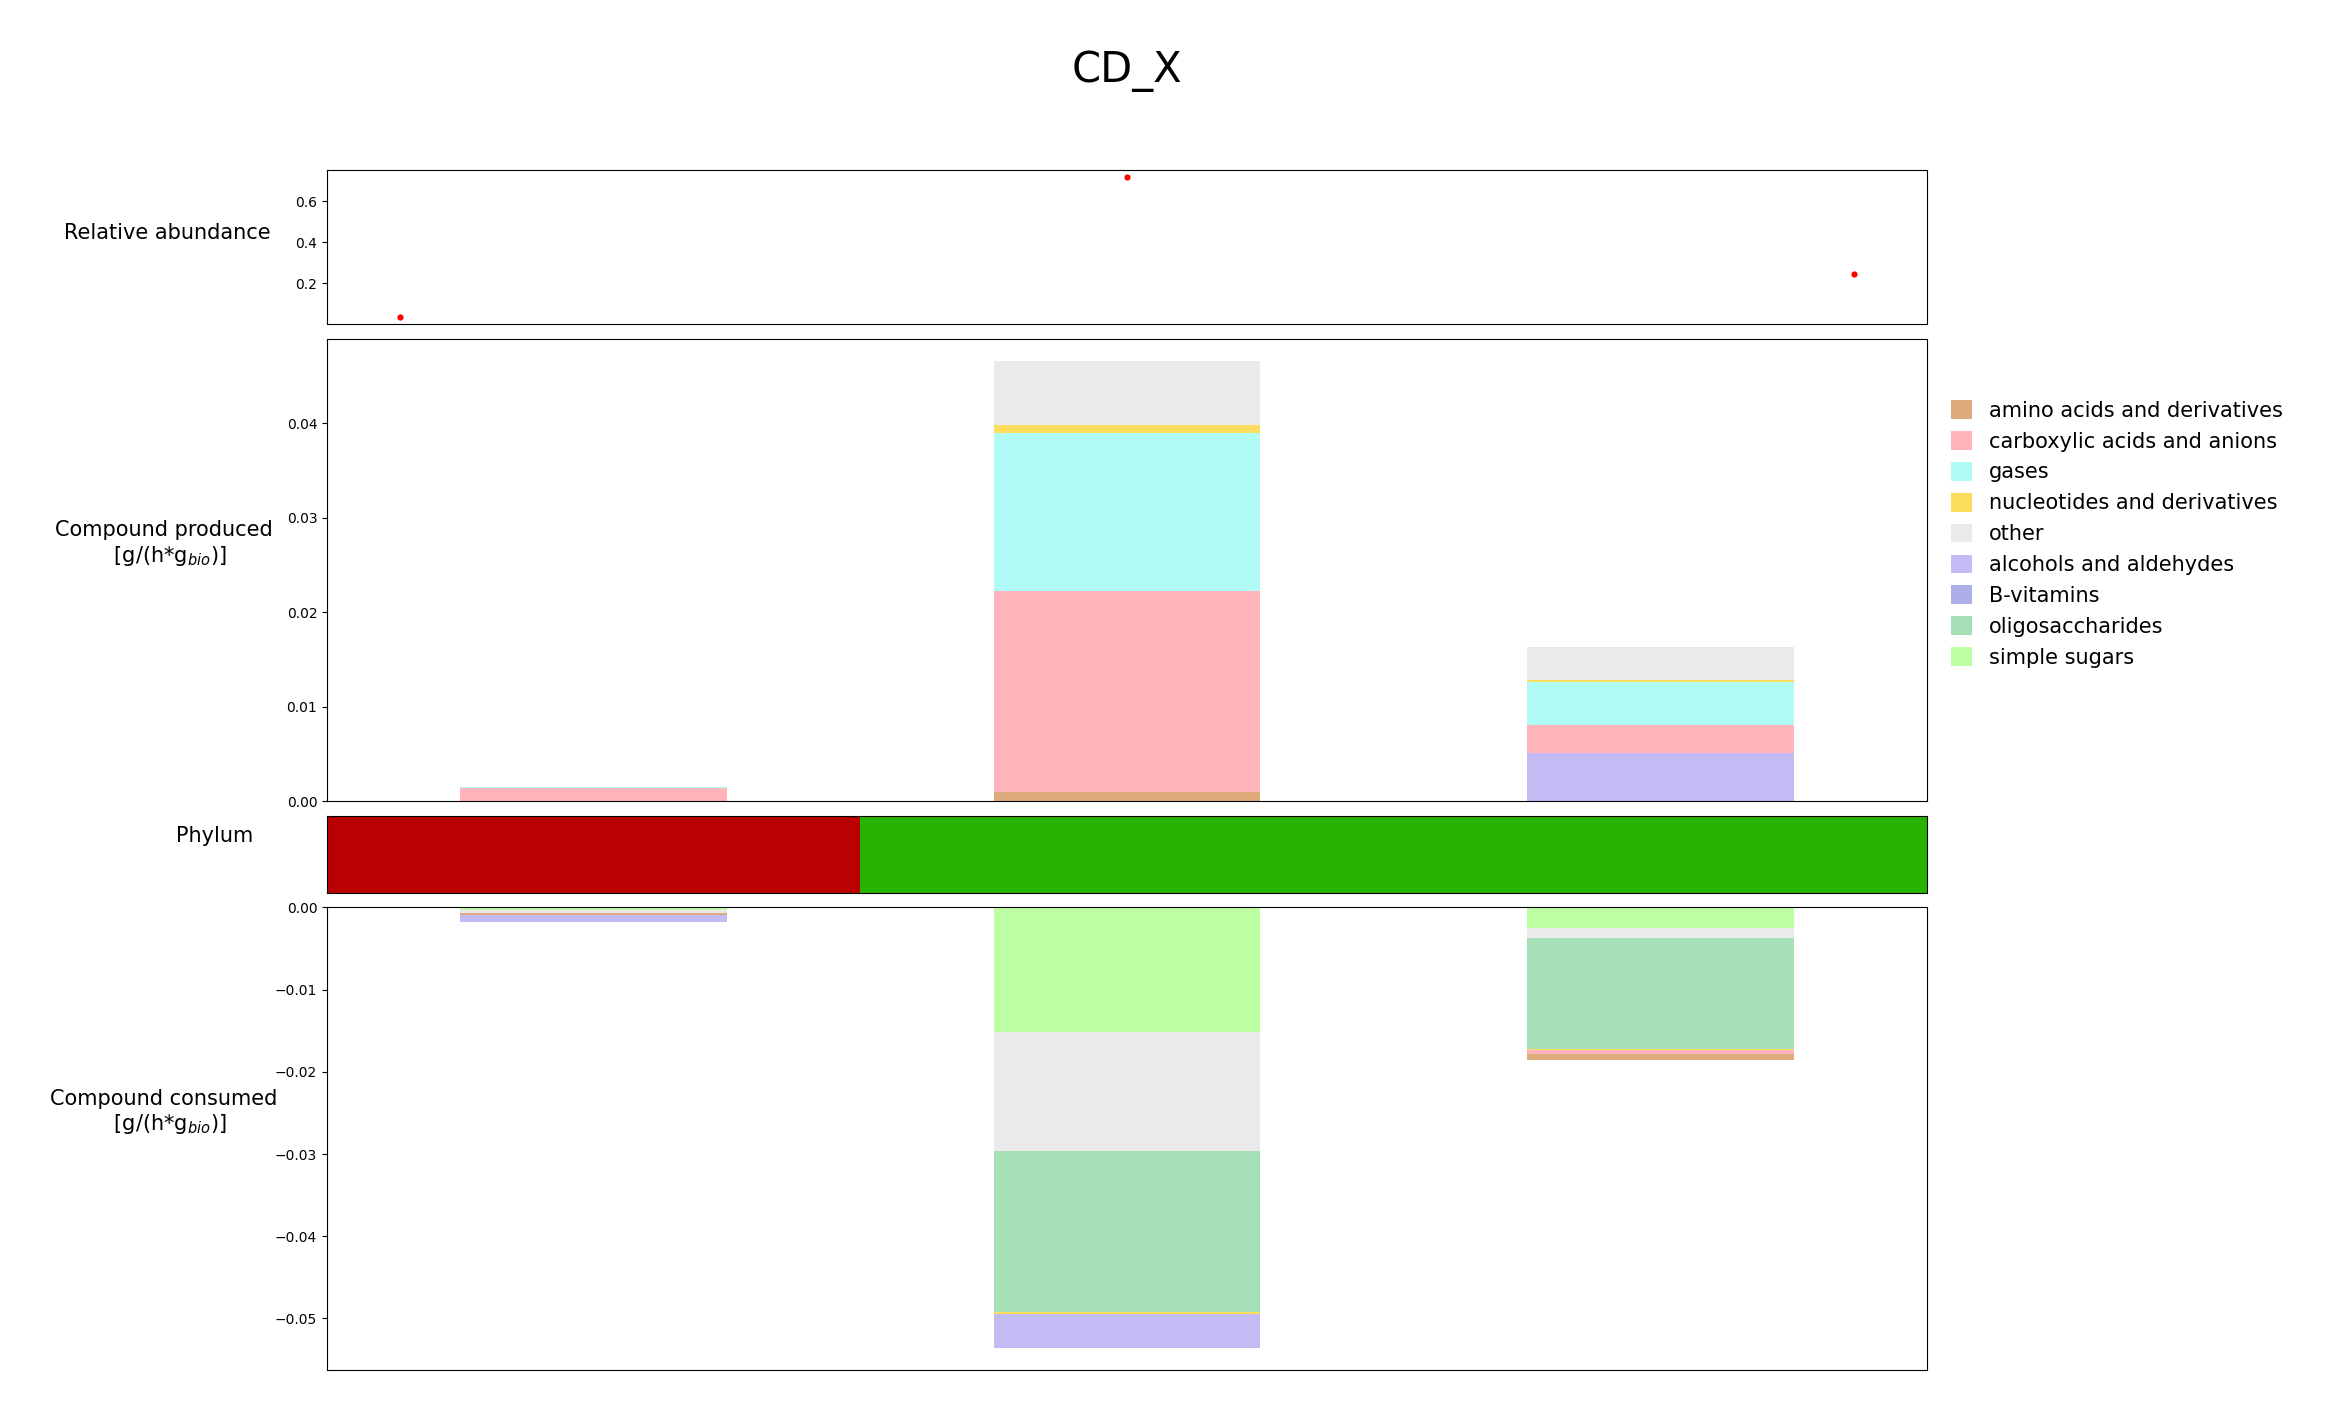

In [57]:
data_receiver_df,data_donor_df,community_abundance =  steadier_plot_func.data_uptake_prod(steadiercom_crossfeeding_all,abundance=abundance,community_id="CD_X",fluxorrate="rate")

fig = steadier_plot_func.plot_uptake_prod(data_receiver_df,data_donor_df,community_abundance,title="CD_X")


#fig.savefig("figures_midterm/steadycom_abundance_"+"CD_X")


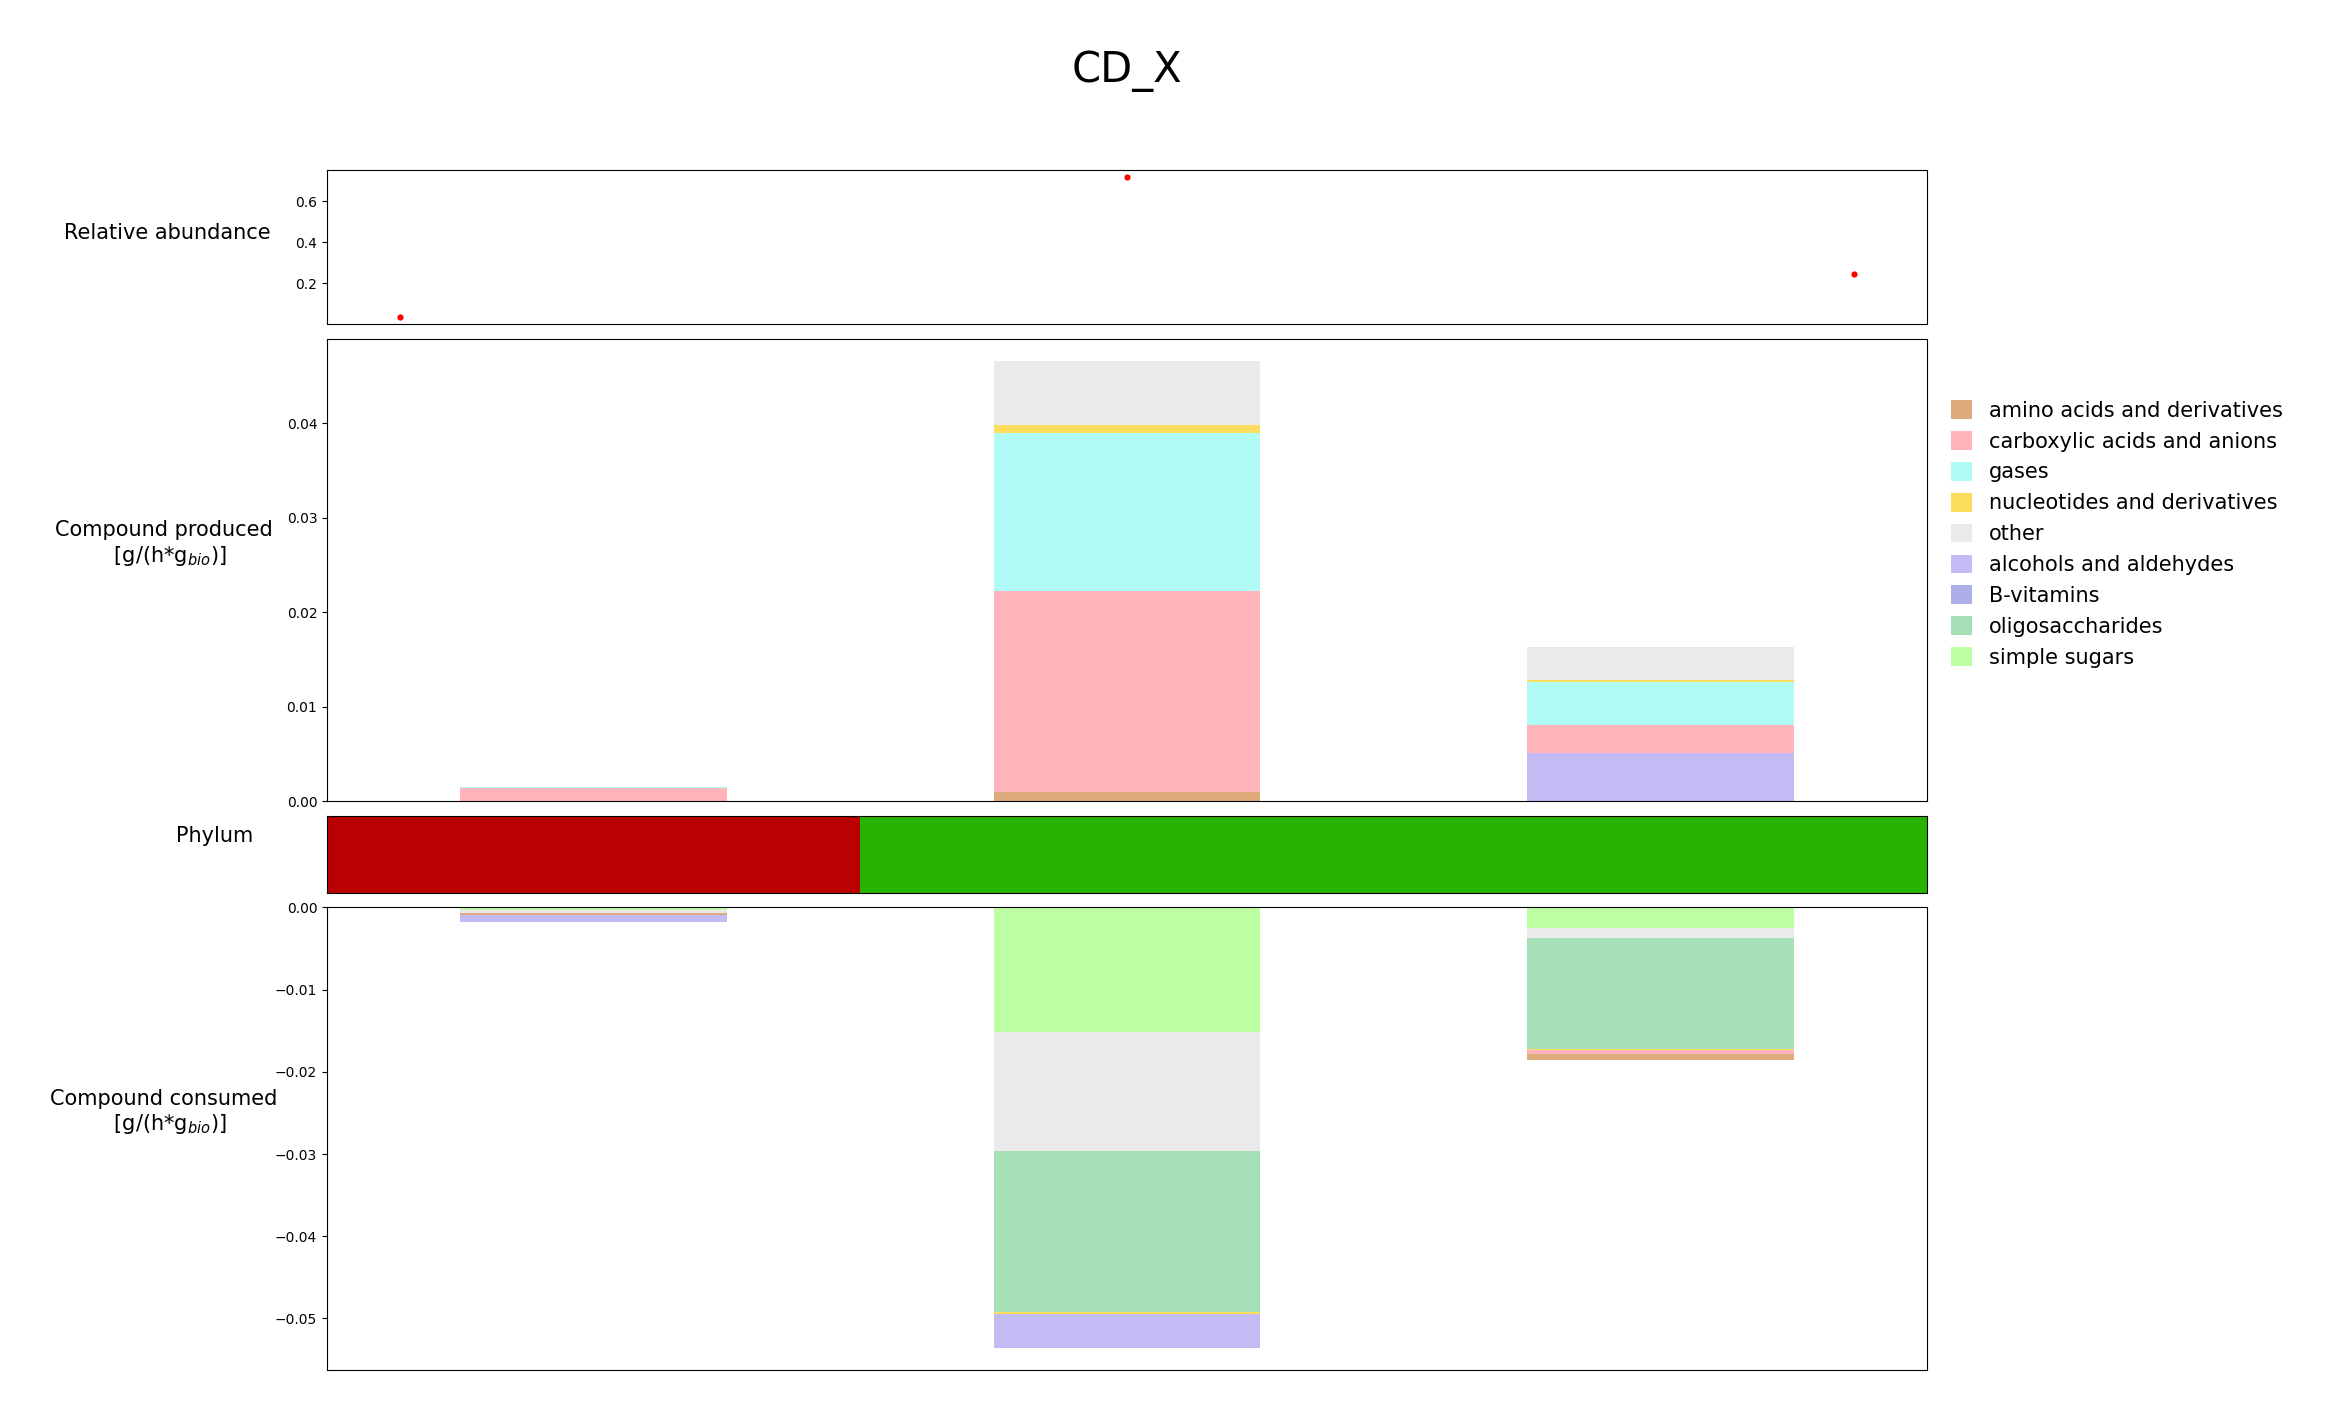

In [58]:
data_receiver_df,data_donor_df,community_abundance =  steadier_plot_func.data_uptake_prod(steadiercom_crossfeeding_all,abundance=abundance,community_id="CD_X",fluxorrate="rate")

fig = steadier_plot_func.plot_uptake_prod(data_receiver_df,data_donor_df,community_abundance,title="CD_X")


#fig.savefig("figures_midterm/steadycom_abundance_"+"CD_X")


### CM_A

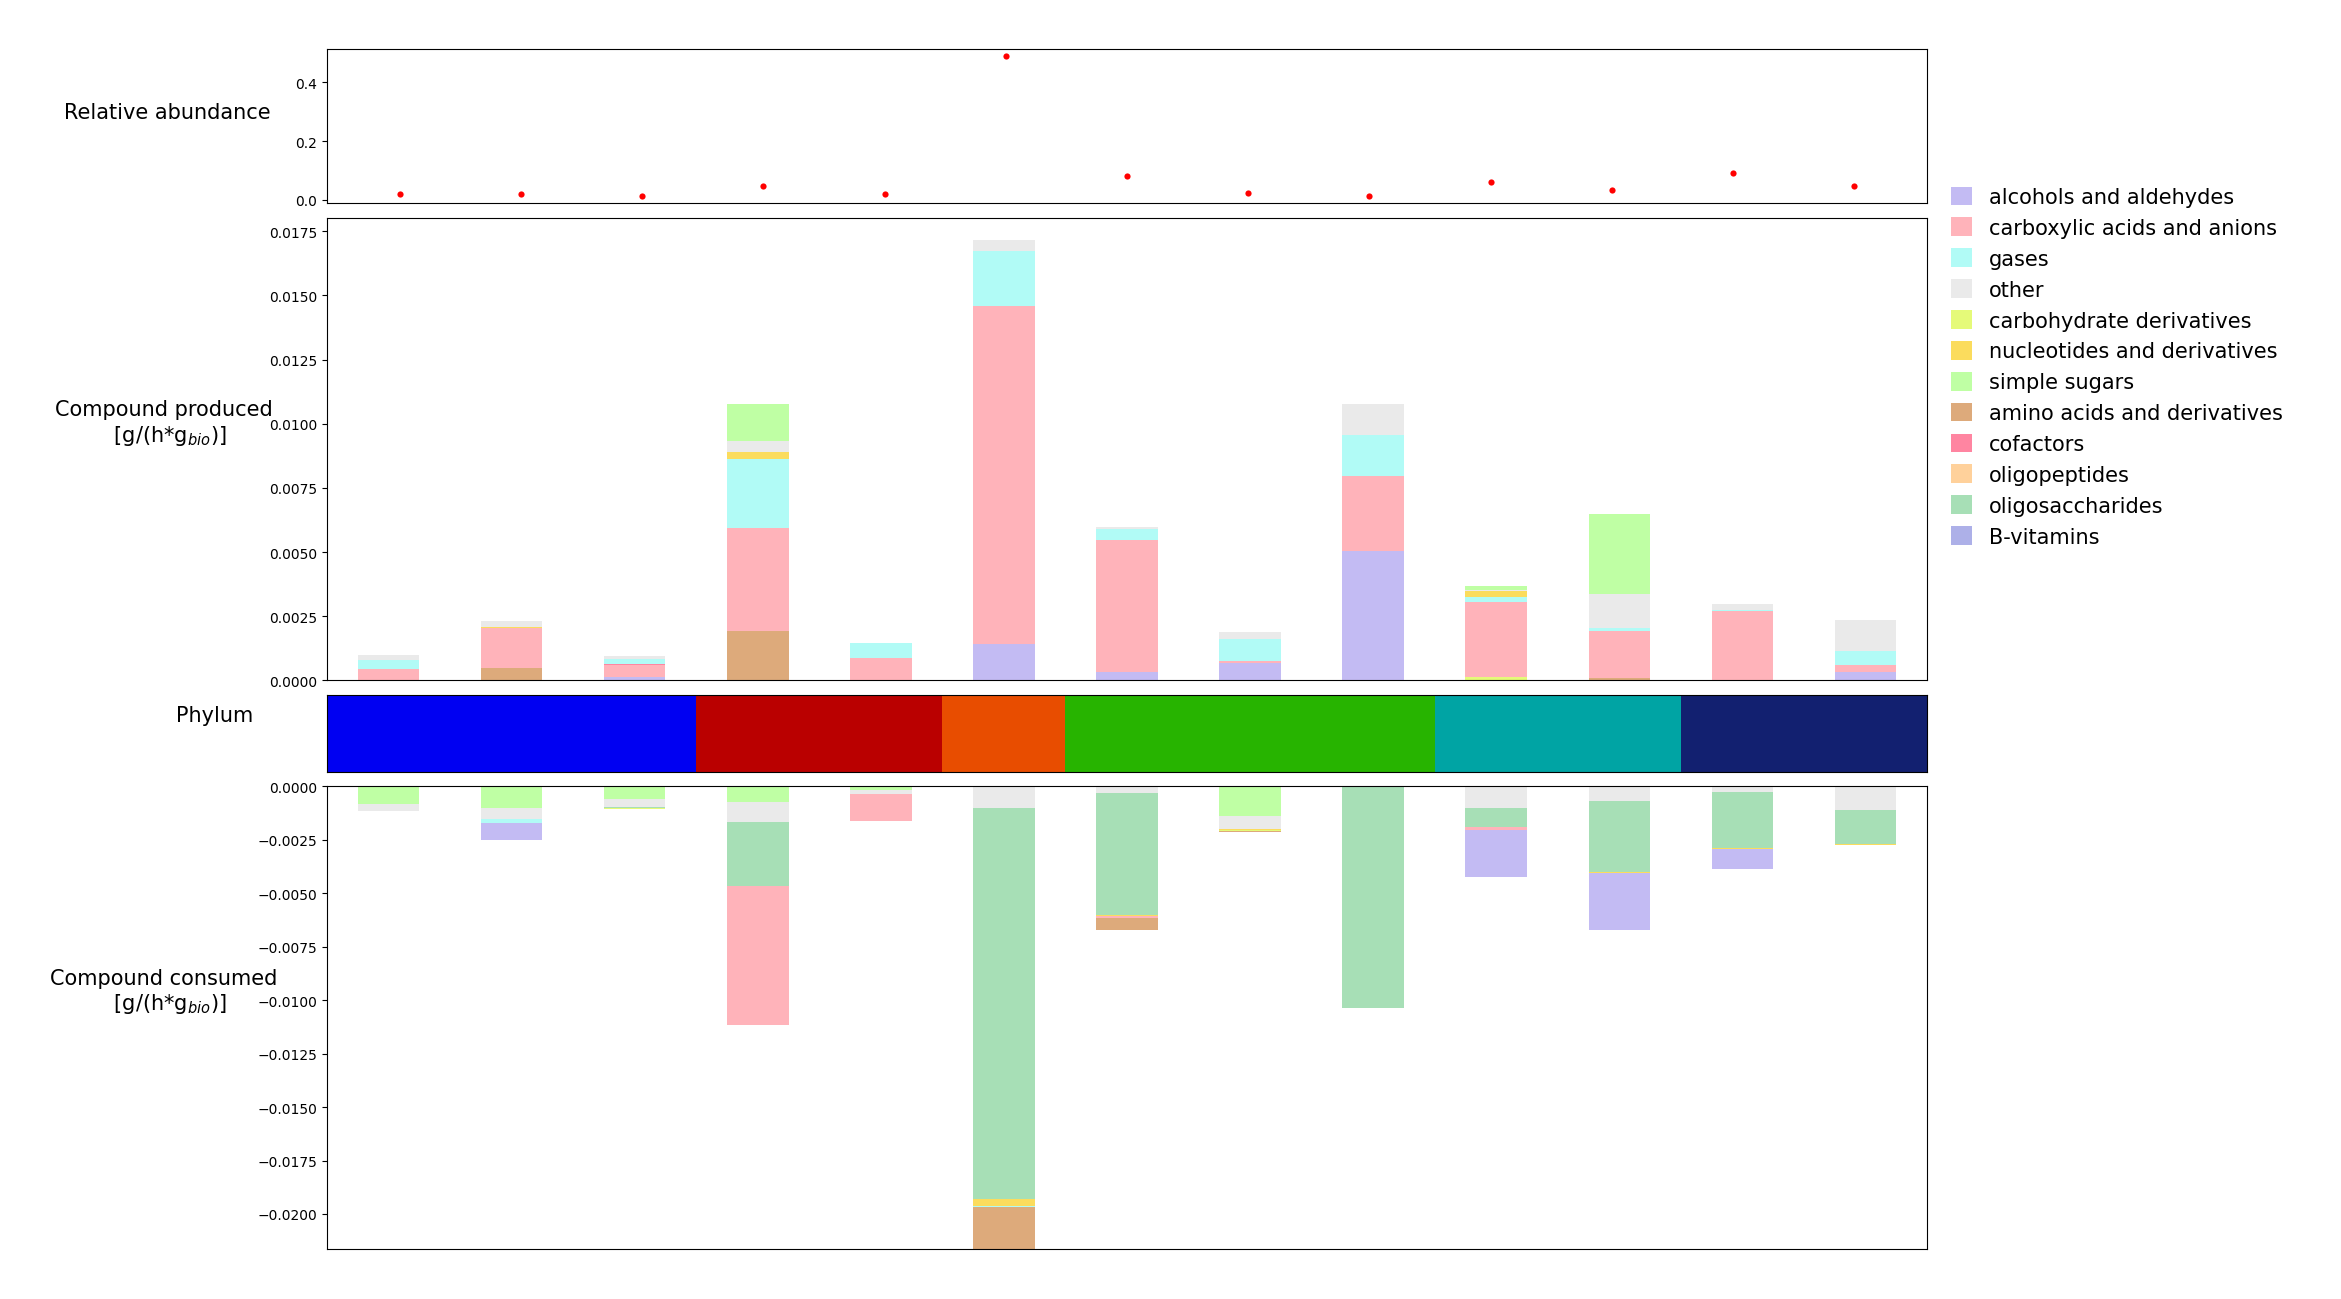

In [59]:
data_receiver_df,data_donor_df,community_abundance =  steadier_plot_func.data_uptake_prod(steadiercom_crossfeeding_all,abundance=abundance,community_id="CM_A",fluxorrate="rate")

fig = steadier_plot_func.plot_uptake_prod(data_receiver_df,data_donor_df,community_abundance)

#fig.savefig("figures_midterm/steadycom_abundance_"+"CM_A")


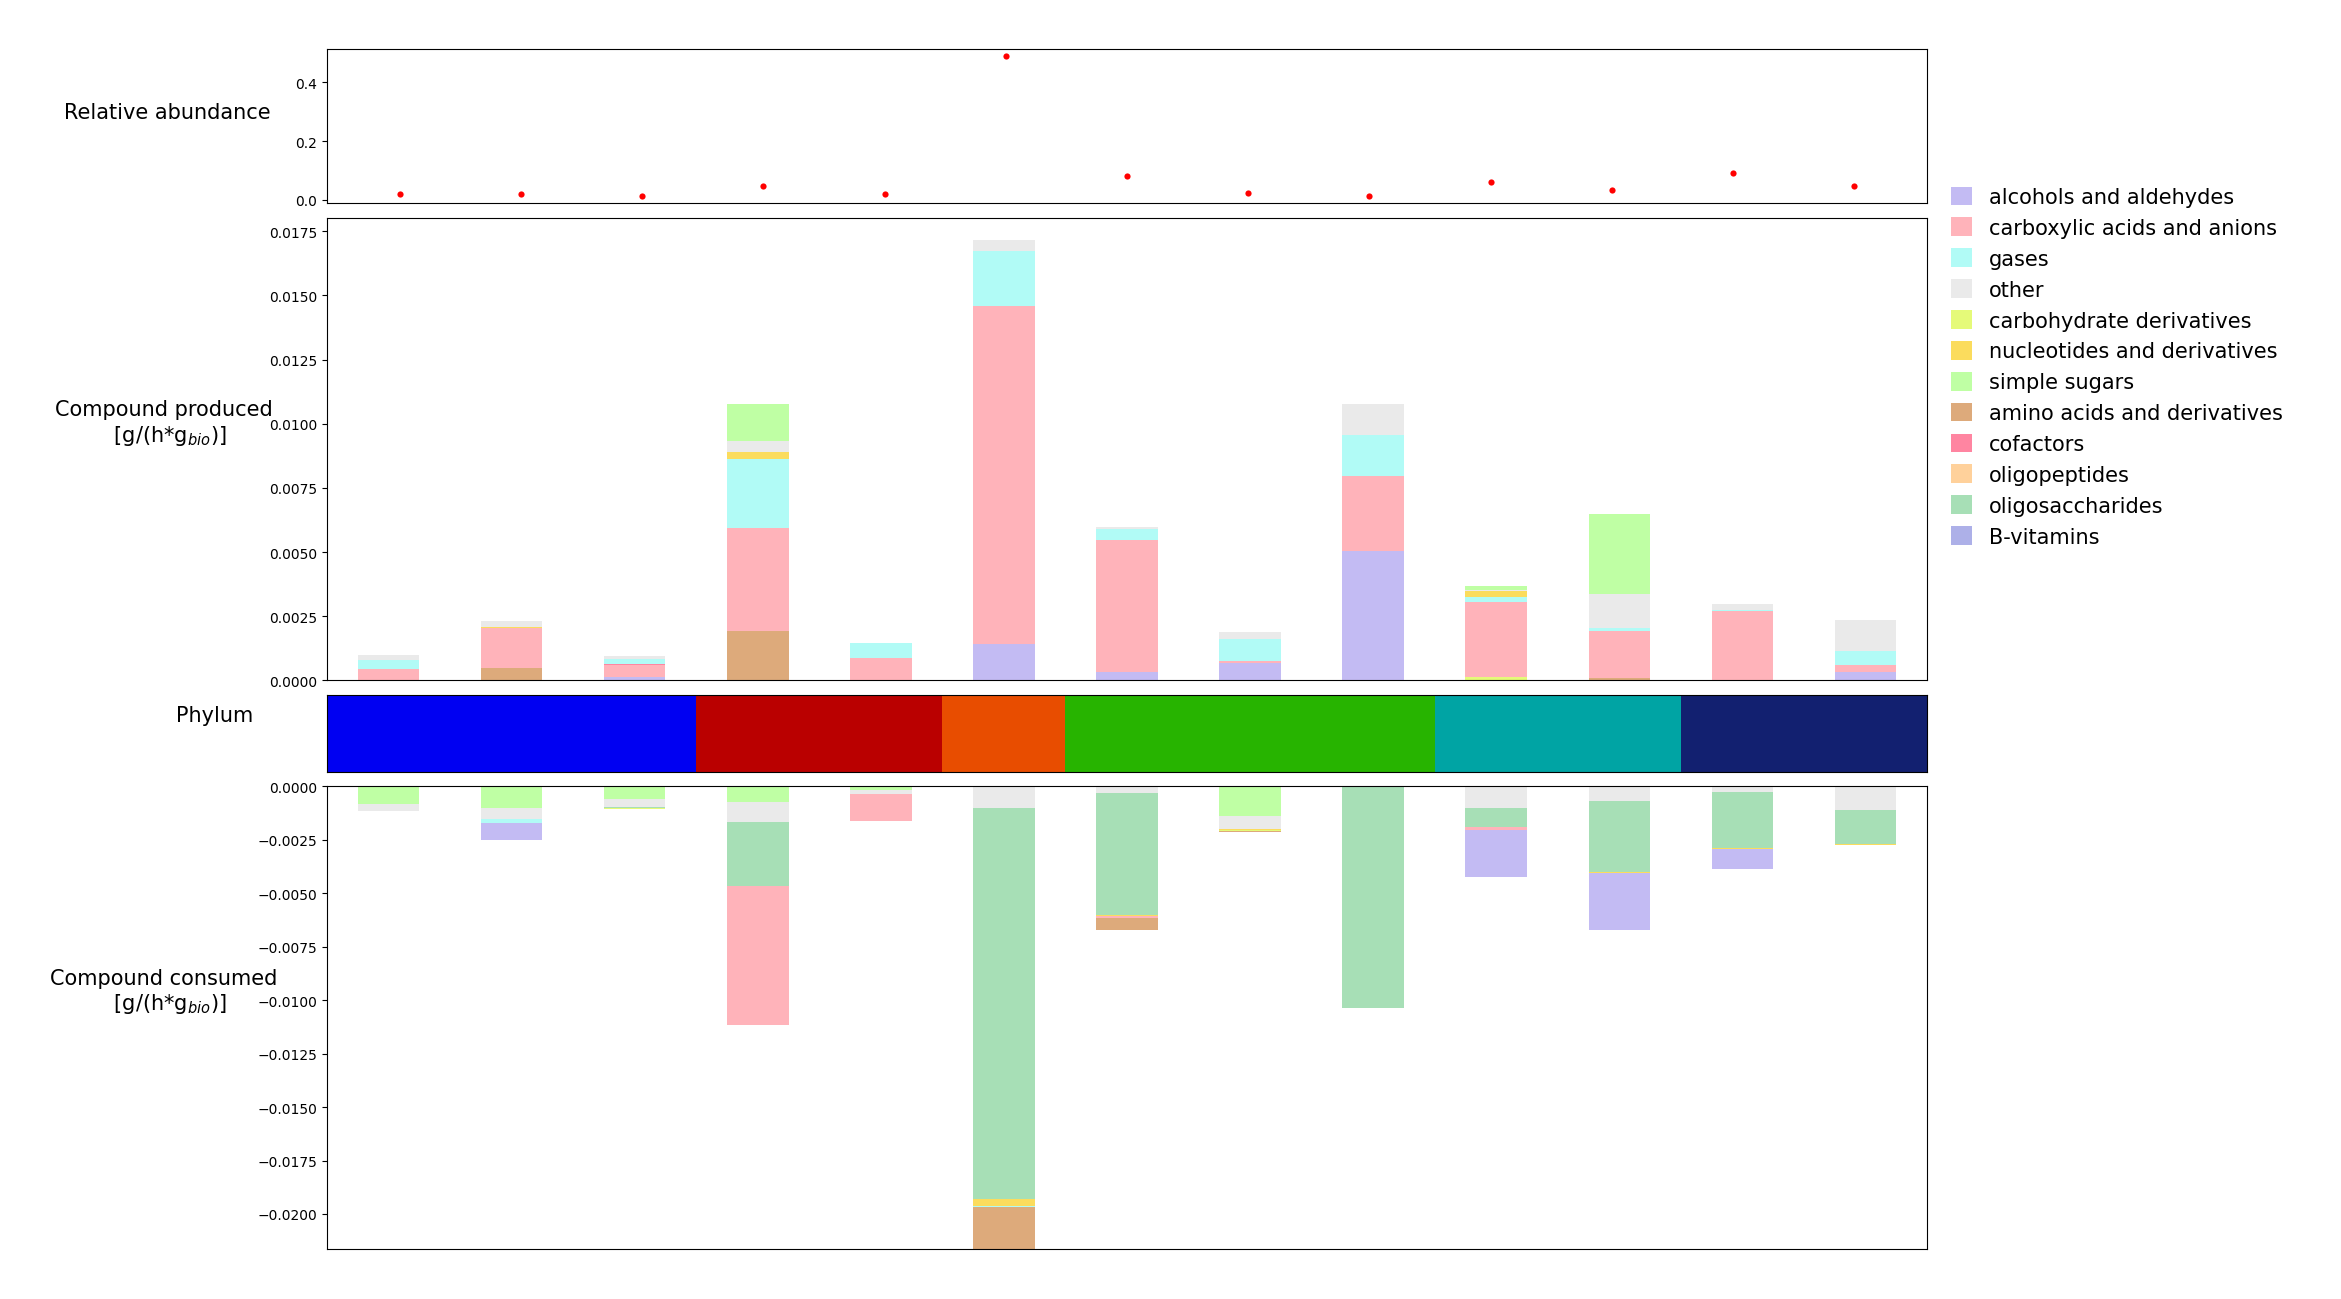

In [60]:
data_receiver_df,data_donor_df,community_abundance =  steadier_plot_func.data_uptake_prod(steadiercom_crossfeeding_all,abundance=abundance,community_id="CM_A",fluxorrate="rate")

fig = steadier_plot_func.plot_uptake_prod(data_receiver_df,data_donor_df,community_abundance)

#fig.savefig("figures_midterm/steadycom_abundance_"+"CM_A")


### CM_P

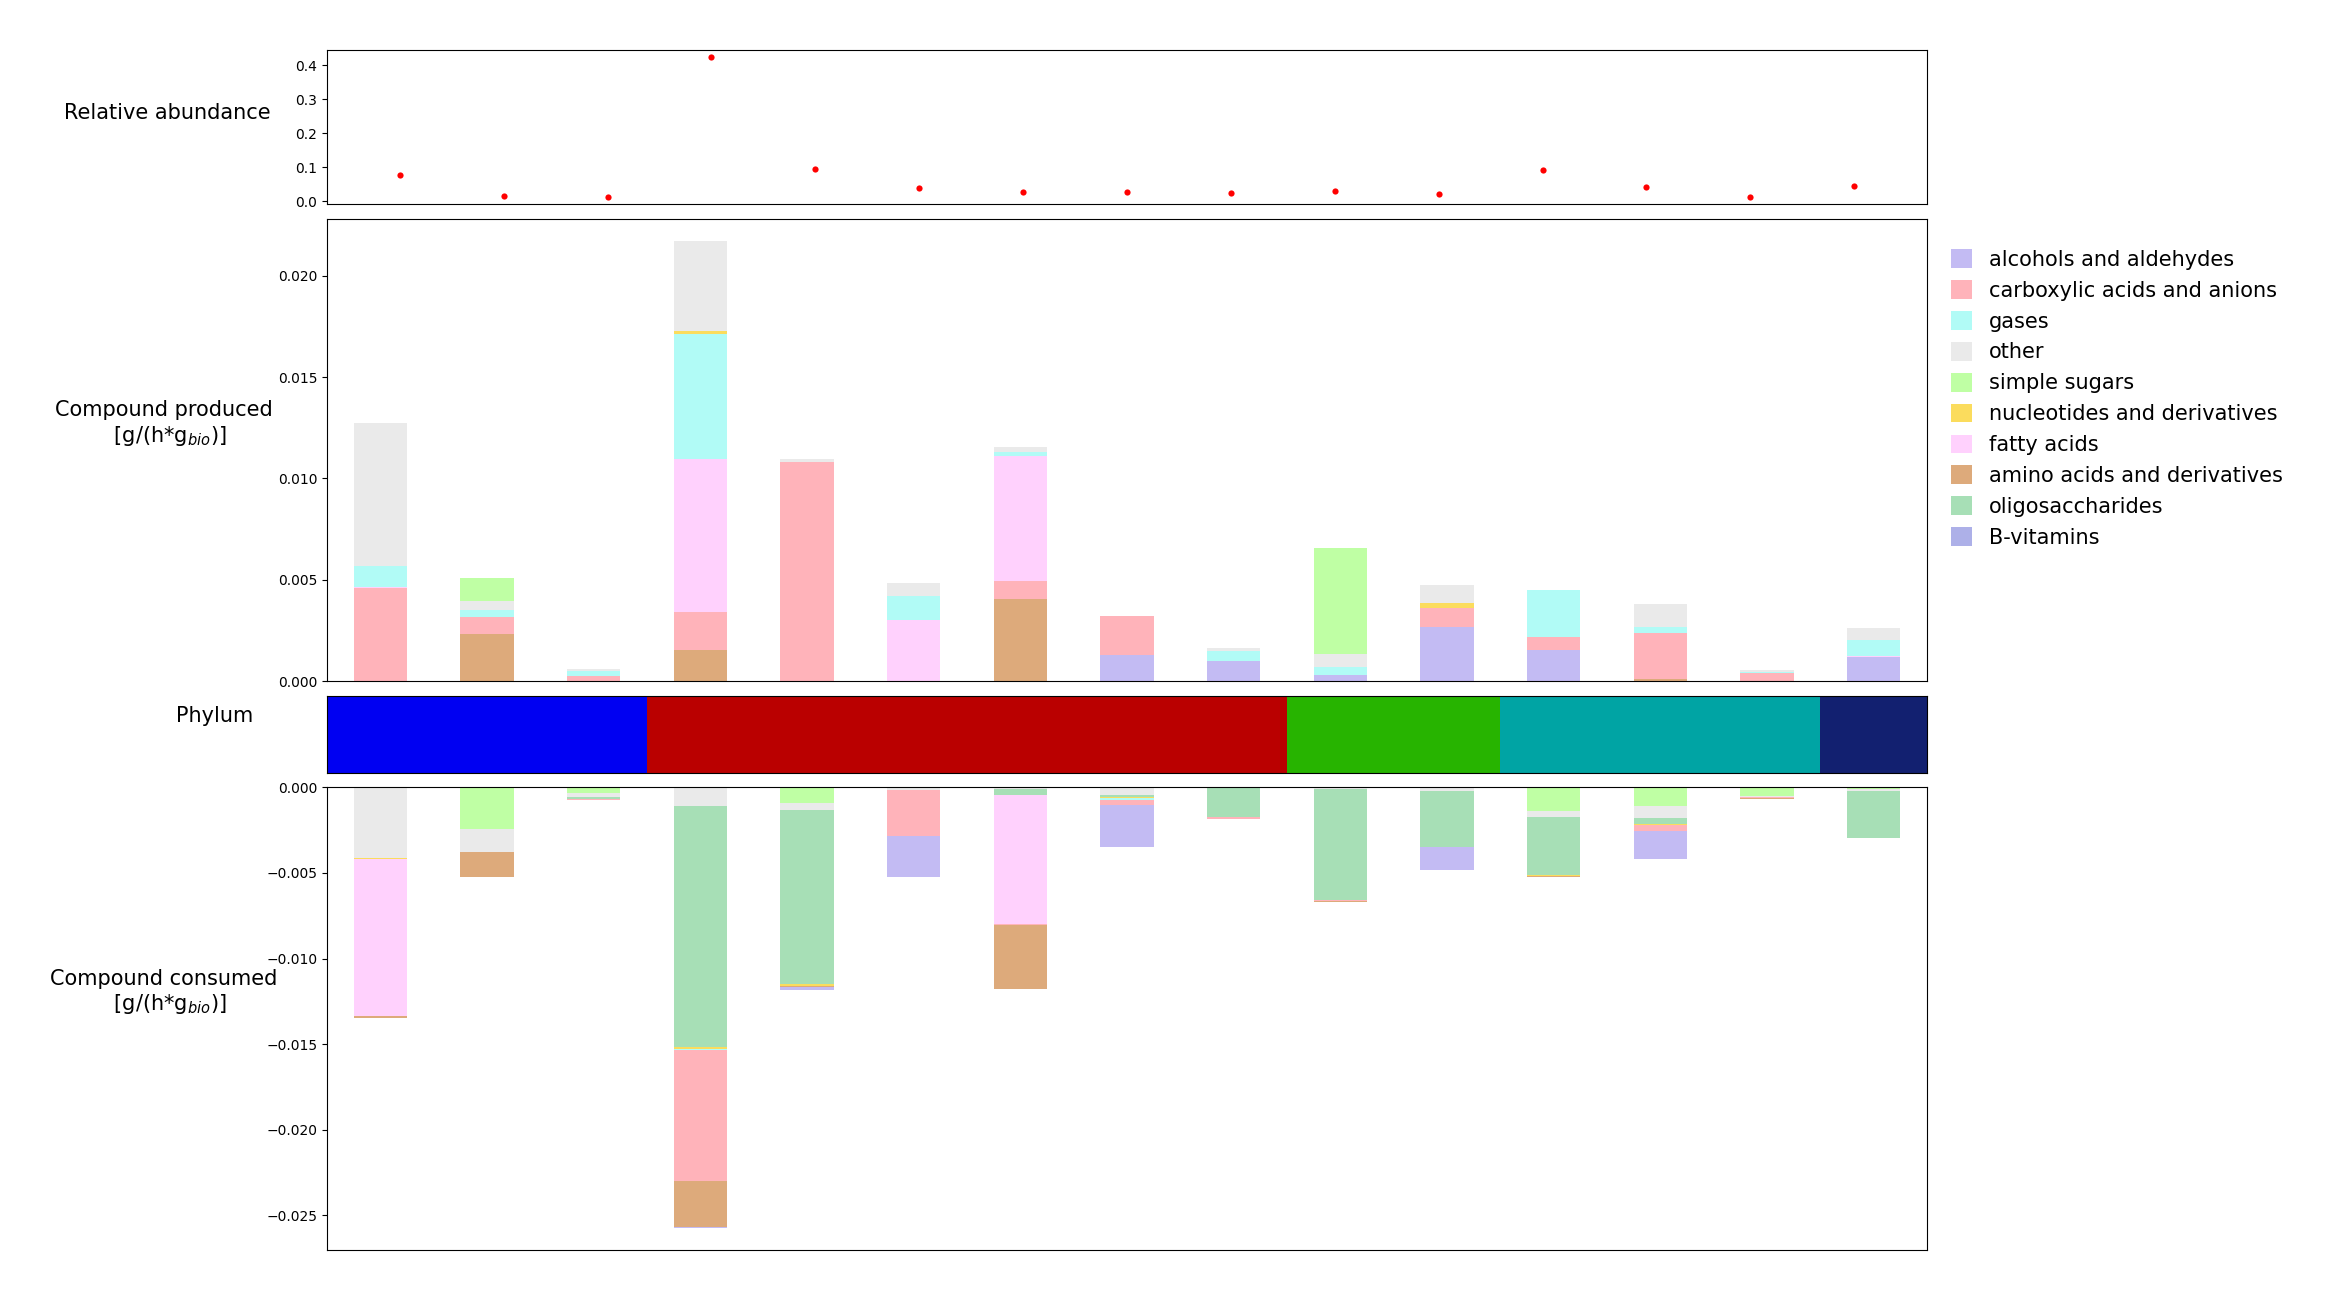

In [61]:
data_receiver_df,data_donor_df,community_abundance =  steadier_plot_func.data_uptake_prod(steadiercom_crossfeeding_all,abundance=abundance,community_id="CM_P",fluxorrate="rate")

fig = steadier_plot_func.plot_uptake_prod(data_receiver_df,data_donor_df,community_abundance)
#fig.savefig("figures_midterm/steadycom_abundance_"+"CM_P")


### CM_X

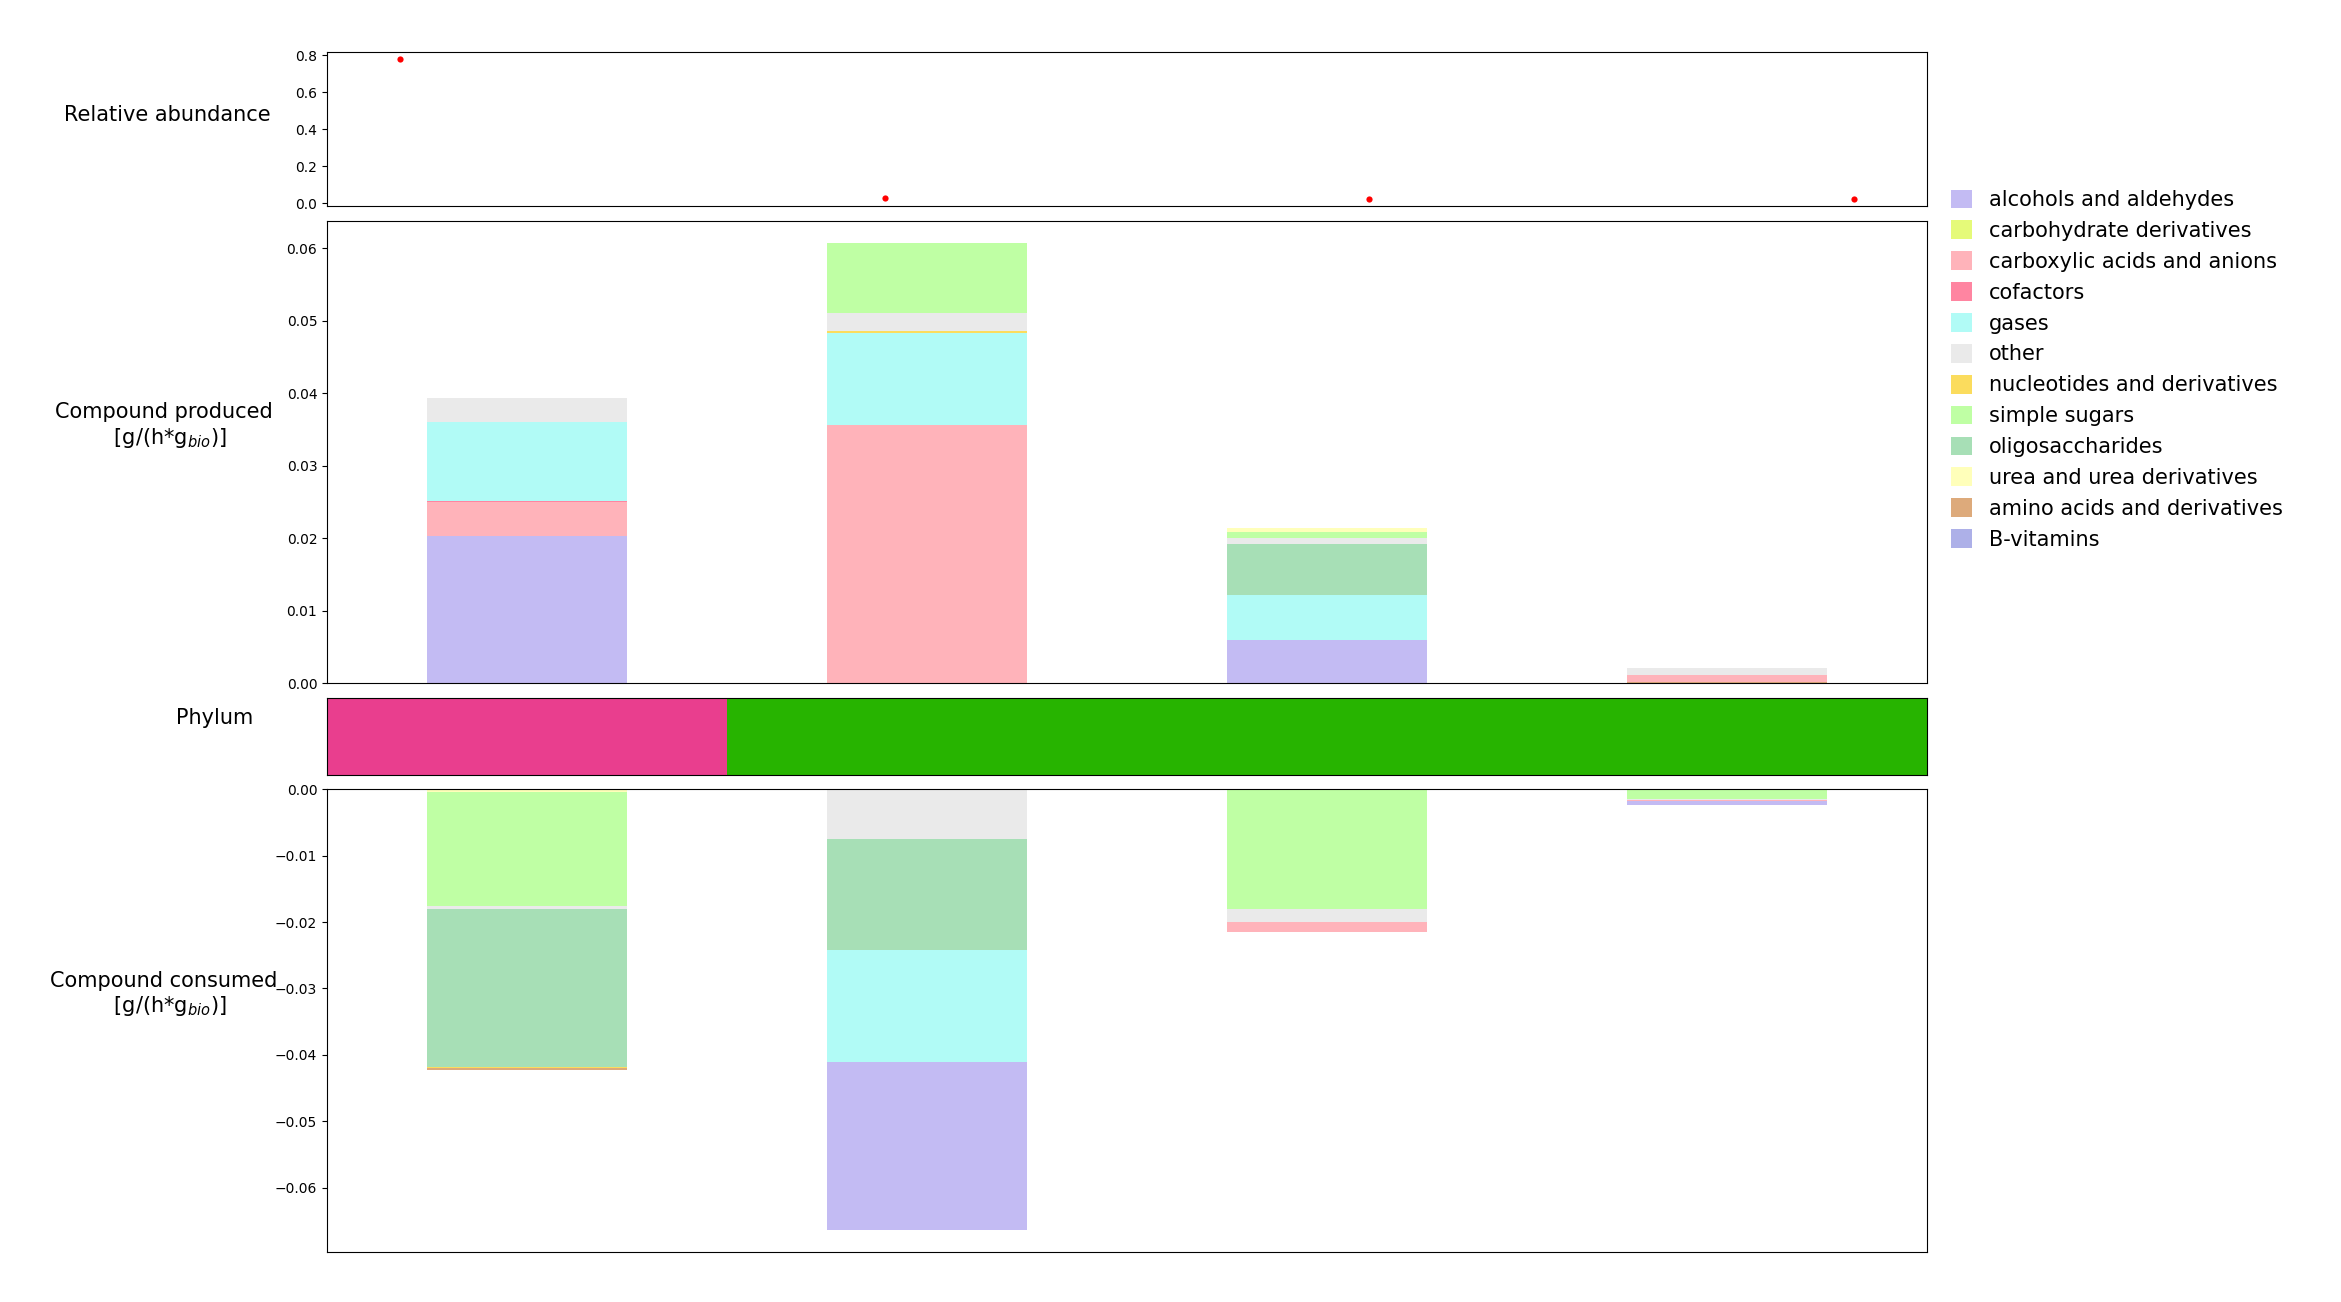

In [62]:
data_receiver_df,data_donor_df,community_abundance =  steadier_plot_func.data_uptake_prod(steadiercom_crossfeeding_all,abundance=abundance,community_id="CM_X",fluxorrate="rate")

fig = steadier_plot_func.plot_uptake_prod(data_receiver_df,data_donor_df,community_abundance)
#fig.savefig("figures_midterm/steadycom_abundance_"+"CM_P")


### M_P

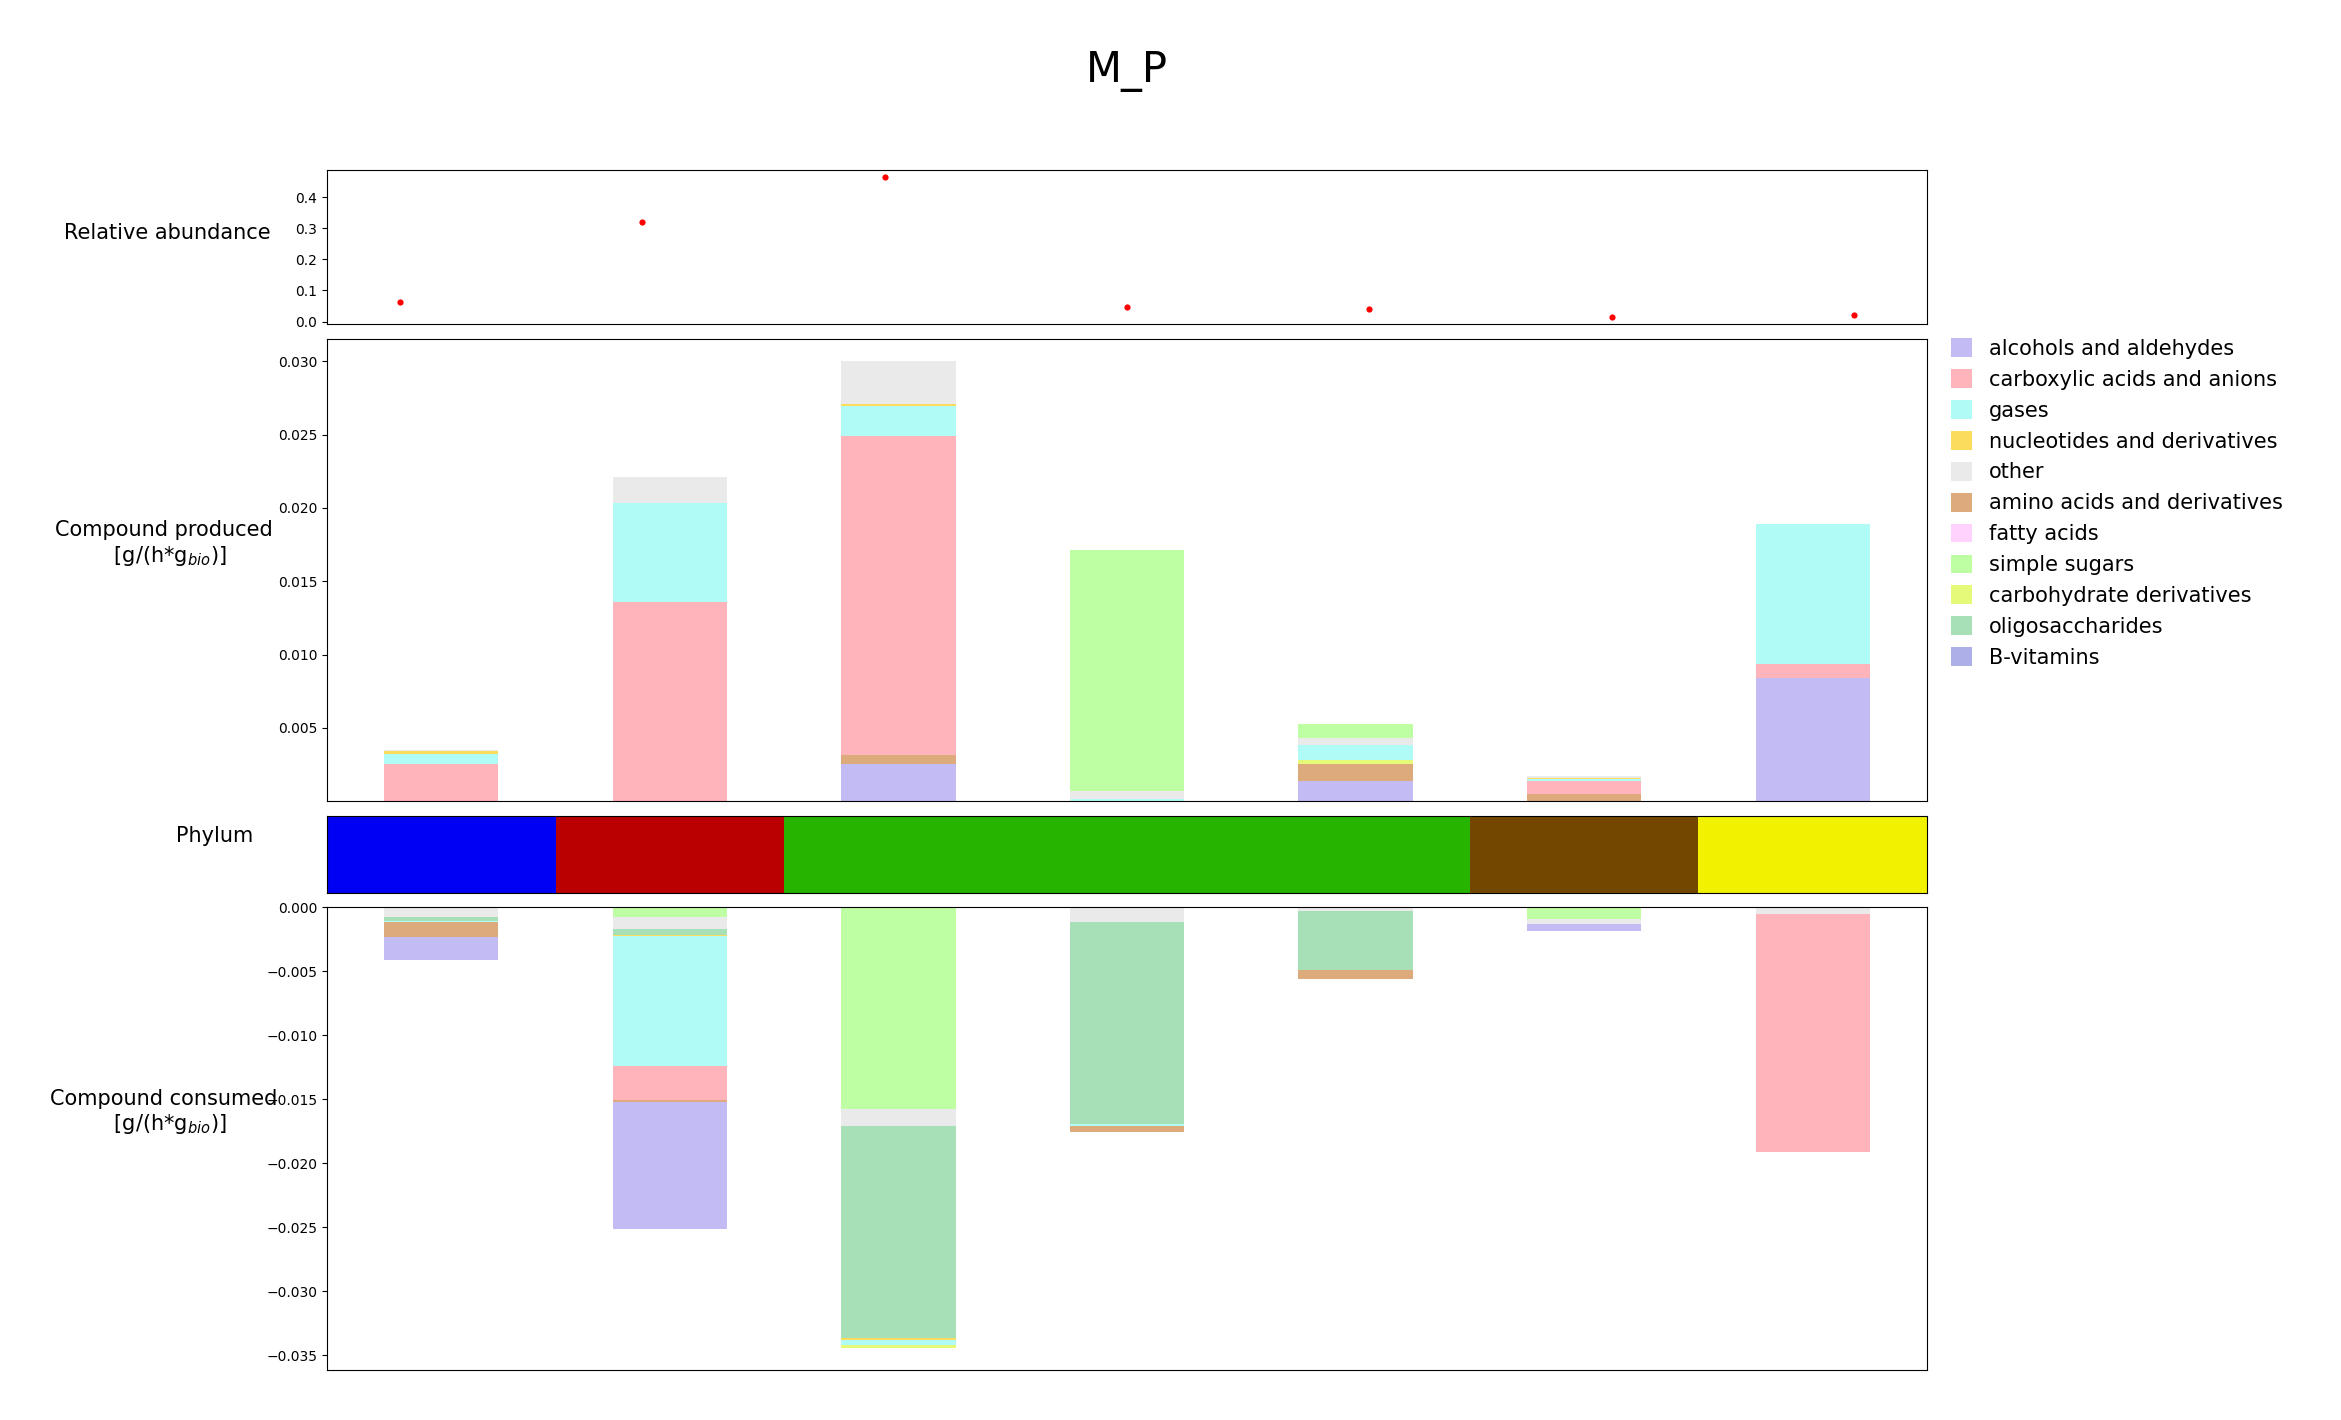

In [63]:
data_receiver_df,data_donor_df,community_abundance =  steadier_plot_func.data_uptake_prod(steadiercom_crossfeeding_all,abundance=abundance,community_id="M_P",fluxorrate="rate")

fig = steadier_plot_func.plot_uptake_prod(data_receiver_df,data_donor_df,community_abundance,title="M_P")
#fig.savefig("figures_midterm/steadycom_abundance_"+"M_P")


### M_X

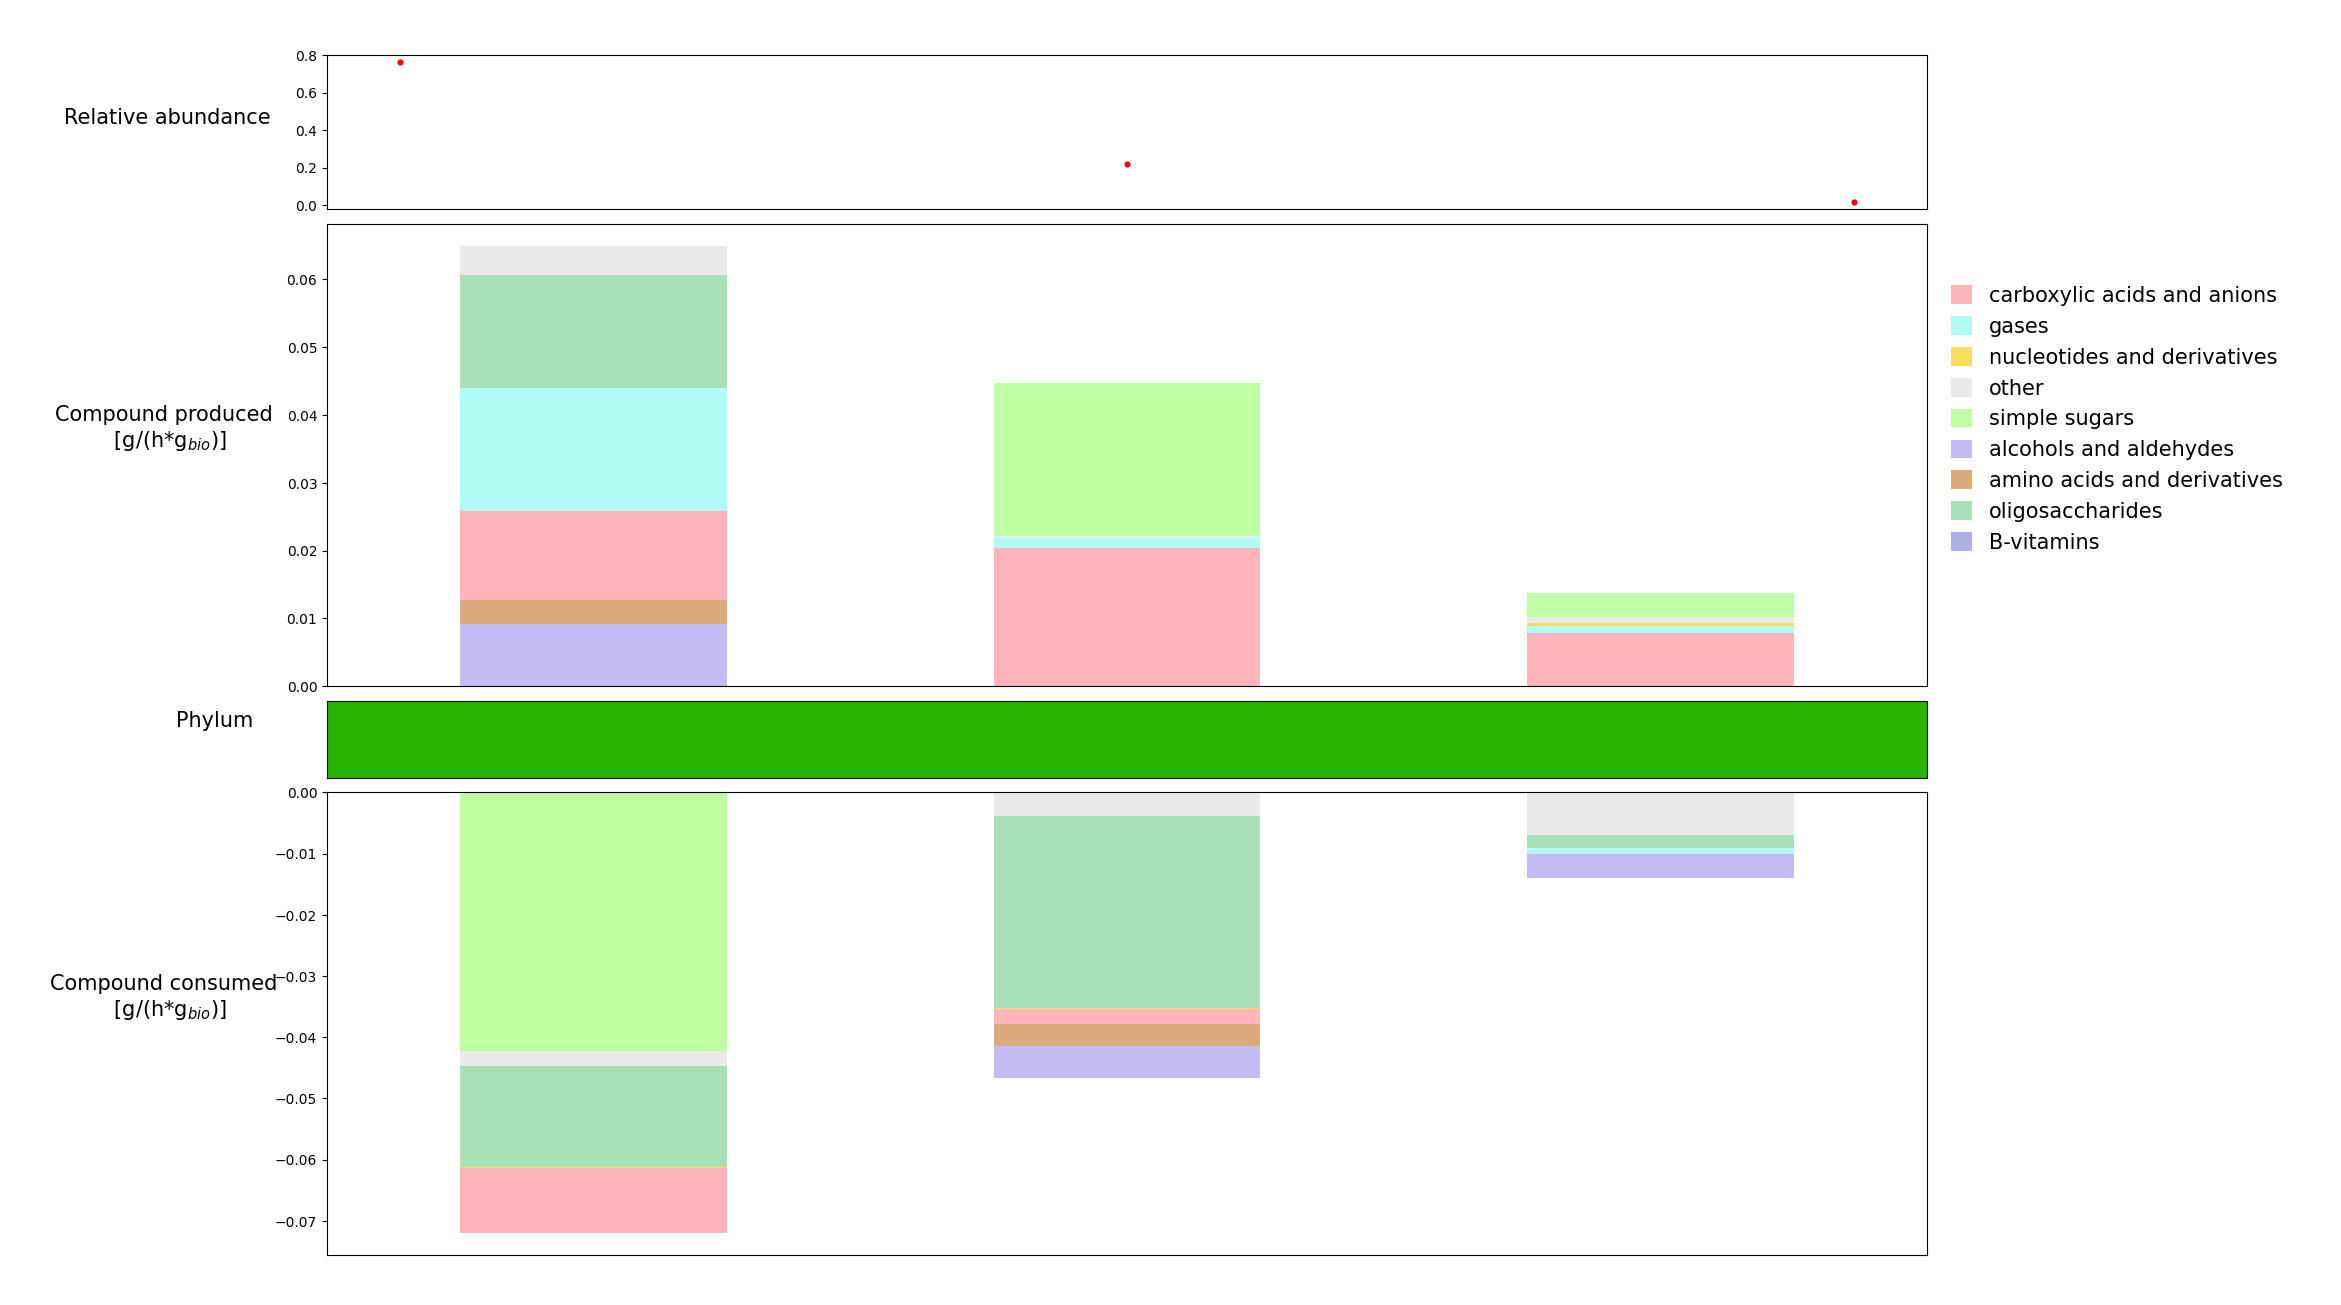

In [64]:
data_receiver_df,data_donor_df,community_abundance =  steadier_plot_func.data_uptake_prod(steadiercom_crossfeeding_all,abundance=abundance,community_id="M_X",fluxorrate="rate")

fig = steadier_plot_func.plot_uptake_prod(data_receiver_df,data_donor_df,community_abundance)
#fig.savefig("figures_for_meeting/steadycom_abundance_"+"M_X")
